In [19]:
animals_folder = "Assessment-1-Dataset/animals"

animals_names = "Assessment-1-Dataset/name of the animals.txt"

In [21]:
# Initialize an empty set to store the words
animals_set = set()

# Open the text file in read mode
with open(animals_names, 'r') as file:
    # Read each line in the file
    for line in file:
        # Split the line into words
        words = line.split()
        # Add each word to the set
        for word in words:
            animals_set.add(word)

# The set 'words_set' now contains all unique words from the file
print(animals_set)

# Assuming you have a set called 'words_set'
count_of_items = len(animals_set)

# Print the count
print(f"Number of unique words in the set: {count_of_items}")


{'fox', 'goose', 'leopard', 'hummingbird', 'crow', 'shark', 'goat', 'reindeer', 'jellyfish', 'porcupine', 'orangutan', 'badger', 'hare', 'duck', 'dolphin', 'pig', 'swan', 'turkey', 'butterfly', 'cockroach', 'flamingo', 'penguin', 'parrot', 'lion', 'donkey', 'elephant', 'oyster', 'hornbill', 'eagle', 'cat', 'seahorse', 'fly', 'octopus', 'gorilla', 'crab', 'pelecaniformes', 'coyote', 'lizard', 'hedgehog', 'deer', 'goldfish', 'pigeon', 'wombat', 'okapi', 'koala', 'cow', 'whale', 'woodpecker', 'panda', 'rat', 'caterpillar', 'hippopotamus', 'boar', 'seal', 'owl', 'ox', 'dragonfly', 'antelope', 'beetle', 'dog', 'kangaroo', 'rhinoceros', 'moth', 'sparrow', 'grasshopper', 'tiger', 'raccoon', 'snake', 'possum', 'sandpiper', 'chimpanzee', 'squirrel', 'bat', 'lobster', 'wolf', 'hyena', 'bear', 'bee', 'zebra', 'starfish', 'hamster', 'horse', 'mouse', 'sheep', 'bison', 'otter', 'turtle', 'ladybugs', 'mosquito', 'squid'}
Number of unique words in the set: 90


In [9]:
# RESIZE

# Importing libraries
import os
from PIL import Image

# Defining the parent directory containing all the animal folders
parent_directory = 'Assessment-1-Dataset/animals'

# Defining the output directory to save resized images
output_directory = 'Assessment-1-Dataset/animals/Output'
os.makedirs(output_directory, exist_ok=True)

# Defining the size to resize images too
resize_size = (128, 128)

print(f"Starting to walk through the directory: {parent_directory}")

# Walking through the parent directory
for root, dirs, files in os.walk(parent_directory):
    for file in files:
        # Different file types incase of multiple formats
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            file_path = os.path.join(root, file)
            print(f"Processing file: {file_path}")

            try:
                # Opening the image and resize it
                image = Image.open(file_path)
                image = image.resize(resize_size)

                # Extracting the folder name (animal name)
                folder_name = os.path.basename(root)

                # Creating output directory for each animal type
                save_folder = os.path.join(output_directory, folder_name)
                os.makedirs(save_folder, exist_ok=True)

                # Making the save path
                save_path = os.path.join(save_folder, file)

                # Saving the resized image
                image.save(save_path)
                print(f"Successfully saved resized image to: {save_path}")

                # Clearing image from memory ready for next one
                del image
            # Catching any errors if they occure
            except (IOError, SyntaxError) as e:
                print(f"Error processing image {file_path}: {e}")

print("Finished processing and saving resized images.")


Starting to walk through the directory: Assessment-1-Dataset/animals
Processing file: Assessment-1-Dataset/animals\antelope\02f4b3be2d.jpg
Successfully saved resized image to: Assessment-1-Dataset/animals/Output\antelope\02f4b3be2d.jpg
Processing file: Assessment-1-Dataset/animals\antelope\03d7fc0888.jpg
Successfully saved resized image to: Assessment-1-Dataset/animals/Output\antelope\03d7fc0888.jpg
Processing file: Assessment-1-Dataset/animals\antelope\058fa9a60f.jpg
Successfully saved resized image to: Assessment-1-Dataset/animals/Output\antelope\058fa9a60f.jpg
Processing file: Assessment-1-Dataset/animals\antelope\0a37838e99.jpg
Successfully saved resized image to: Assessment-1-Dataset/animals/Output\antelope\0a37838e99.jpg
Processing file: Assessment-1-Dataset/animals\antelope\0b1a3af197.jpg
Successfully saved resized image to: Assessment-1-Dataset/animals/Output\antelope\0b1a3af197.jpg
Processing file: Assessment-1-Dataset/animals\antelope\0b688923b0.jpg
Successfully saved resized

In [23]:
# CHECKING FOR DUPES

# Importing libraries
import os
import hashlib
from PIL import Image
import numpy as np

# Gets a image hash for each image
def image_hash(image):
    hasher = hashlib.md5()
    with image.convert('RGB') as img:
        img_data = img.tobytes()
        hasher.update(img_data)
    return hasher.hexdigest()

# Finds dupe images in directory
def find_duplicates(image_dict):
    hash_map = {}
    duplicates = []

    for folder, images in image_dict.items():
        print(f"Checking for duplicates in folder: {folder}")
        for img_array in images:
            img = Image.fromarray(img_array)
            img_hash = image_hash(img)
            if img_hash in hash_map:
                duplicates.append((hash_map[img_hash], img_hash))
            else:
                hash_map[img_hash] = (folder, img_array)

    return duplicates, hash_map

# Defining the output directory where resized images are stored
output_directory = 'Assessment-1-Dataset/animals/Output'

# Initializing a dictionary to store images by folder name
images_dict = {}

print(f"Starting to load images from the directoryy: {output_directory}")

# Walking through the output directory
for root, dirs, files in os.walk(output_directory):
    if not files:
        continue
    folder_name = os.path.basename(root)
    images_dict[folder_name] = []

    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            file_path = os.path.join(root, file)
            print(f"Loading file: {file_path}")

            try:
                # Opening the image and convert it to a numpy array
                image = Image.open(file_path)
                image_array = np.array(image)

                # Adding the image array to the dictionary
                images_dict[folder_name].append(image_array)

                # Clearing image from memory dor next
                del image, image_array

            # Cathcing any errors
            except (IOError, SyntaxError) as e:
                print(f"Error loading image {file_path}: {e}")

print(f"Finished loading images from {len(images_dict)} folders.")

# Checking for duplicates
duplicates, hash_map = find_duplicates(images_dict)

if duplicates:
    print(f"Found {len(duplicates)} duplicate images.")
else:
    print("No duplicates found.")

# CHECKING FOR DUPES

Starting to load images from the directory: Assessment-1-Dataset/animals/Output
Loading file: Assessment-1-Dataset/animals/Output\antelope\02f4b3be2d.jpg
Loading file: Assessment-1-Dataset/animals/Output\antelope\03d7fc0888.jpg
Loading file: Assessment-1-Dataset/animals/Output\antelope\058fa9a60f.jpg
Loading file: Assessment-1-Dataset/animals/Output\antelope\0a37838e99.jpg
Loading file: Assessment-1-Dataset/animals/Output\antelope\0b1a3af197.jpg
Loading file: Assessment-1-Dataset/animals/Output\antelope\0b688923b0.jpg
Loading file: Assessment-1-Dataset/animals/Output\antelope\0c16ef86c0.jpg
Loading file: Assessment-1-Dataset/animals/Output\antelope\0e17715606.jpg
Loading file: Assessment-1-Dataset/animals/Output\antelope\0ee903ea13.jpg
Loading file: Assessment-1-Dataset/animals/Output\antelope\0fb2e9aa81.jpg
Loading file: Assessment-1-Dataset/animals/Output\antelope\0fe7076f06.jpg
Loading file: Assessment-1-Dataset/animals/Output\antelope\17a07512e9.jpg
Loading file: Assessment-1-Datas

Loading file: Assessment-1-Dataset/animals/Output\beetle\92df7bb742.jpg
Loading file: Assessment-1-Dataset/animals/Output\beetle\93fb82b04b.jpg
Loading file: Assessment-1-Dataset/animals/Output\beetle\9977af1a6f.jpg
Loading file: Assessment-1-Dataset/animals/Output\beetle\99c2f09107.jpg
Loading file: Assessment-1-Dataset/animals/Output\beetle\fff3087af1.jpg
Loading file: Assessment-1-Dataset/animals/Output\bison\02116e752c.jpg
Loading file: Assessment-1-Dataset/animals/Output\bison\09fb217ec3.jpg
Loading file: Assessment-1-Dataset/animals/Output\bison\0cd71800f3.jpg
Loading file: Assessment-1-Dataset/animals/Output\bison\133ca596fe.jpg
Loading file: Assessment-1-Dataset/animals/Output\bison\150de5d9c4.jpg
Loading file: Assessment-1-Dataset/animals/Output\bison\17fd28dbd4.jpg
Loading file: Assessment-1-Dataset/animals/Output\bison\1a94573fa2.jpg
Loading file: Assessment-1-Dataset/animals/Output\bison\1a993de5a8.jpg
Loading file: Assessment-1-Dataset/animals/Output\bison\1c4993f09f.jpg
L

Loading file: Assessment-1-Dataset/animals/Output\butterfly\10dd21a05c.jpg
Loading file: Assessment-1-Dataset/animals/Output\butterfly\110f709dfb.jpg
Loading file: Assessment-1-Dataset/animals/Output\butterfly\11ccf63df4.jpg
Loading file: Assessment-1-Dataset/animals/Output\butterfly\13bc40b533.jpg
Loading file: Assessment-1-Dataset/animals/Output\butterfly\16a79172c2.jpg
Loading file: Assessment-1-Dataset/animals/Output\butterfly\16b44ef03b.jpg
Loading file: Assessment-1-Dataset/animals/Output\butterfly\179b8e3c33.jpg
Loading file: Assessment-1-Dataset/animals/Output\butterfly\1c1de9b3a2.jpg
Loading file: Assessment-1-Dataset/animals/Output\butterfly\1c382b3385.jpg
Loading file: Assessment-1-Dataset/animals/Output\butterfly\1c97438e96.jpg
Loading file: Assessment-1-Dataset/animals/Output\butterfly\2105f72d23.jpg
Loading file: Assessment-1-Dataset/animals/Output\butterfly\215f5c919b.jpg
Loading file: Assessment-1-Dataset/animals/Output\butterfly\26c0074cef.jpg
Loading file: Assessment-

Loading file: Assessment-1-Dataset/animals/Output\caterpillar\057e9fe5b2.jpg
Loading file: Assessment-1-Dataset/animals/Output\caterpillar\05f54f4b9c.jpg
Loading file: Assessment-1-Dataset/animals/Output\caterpillar\061f28e3af.jpg
Loading file: Assessment-1-Dataset/animals/Output\caterpillar\0db5ad156e.jpg
Loading file: Assessment-1-Dataset/animals/Output\caterpillar\0e70de7f25.jpg
Loading file: Assessment-1-Dataset/animals/Output\caterpillar\0f43ca915d.jpg
Loading file: Assessment-1-Dataset/animals/Output\caterpillar\0f651f75c0.jpg
Loading file: Assessment-1-Dataset/animals/Output\caterpillar\10a38bcbed.jpg
Loading file: Assessment-1-Dataset/animals/Output\caterpillar\15f1a5e01b.jpg
Loading file: Assessment-1-Dataset/animals/Output\caterpillar\1ac6e9e115.jpg
Loading file: Assessment-1-Dataset/animals/Output\caterpillar\1c8669c4d6.jpg
Loading file: Assessment-1-Dataset/animals/Output\caterpillar\1f67ad9681.jpg
Loading file: Assessment-1-Dataset/animals/Output\caterpillar\21b68b5df1.jpg

Loading file: Assessment-1-Dataset/animals/Output\cockroach\3b800c50d4.jpg
Loading file: Assessment-1-Dataset/animals/Output\cockroach\3ded9bb960.jpg
Loading file: Assessment-1-Dataset/animals/Output\cockroach\3ff6355b91.jpg
Loading file: Assessment-1-Dataset/animals/Output\cockroach\40507d5042.jpg
Loading file: Assessment-1-Dataset/animals/Output\cockroach\4053abc3b0.jpg
Loading file: Assessment-1-Dataset/animals/Output\cockroach\41a787d5b6.jpg
Loading file: Assessment-1-Dataset/animals/Output\cockroach\42cb010423.jpg
Loading file: Assessment-1-Dataset/animals/Output\cockroach\451579fd29.jpg
Loading file: Assessment-1-Dataset/animals/Output\cockroach\454fe556e7.jpg
Loading file: Assessment-1-Dataset/animals/Output\cockroach\4d0a6f13b4.jpg
Loading file: Assessment-1-Dataset/animals/Output\cockroach\4f4da8b7cc.jpg
Loading file: Assessment-1-Dataset/animals/Output\cockroach\4f72227f5c.jpg
Loading file: Assessment-1-Dataset/animals/Output\cockroach\50a79c35fb.jpg
Loading file: Assessment-

Loading file: Assessment-1-Dataset/animals/Output\coyote\4ebd97228c.jpg
Loading file: Assessment-1-Dataset/animals/Output\coyote\4f33c939db.jpg
Loading file: Assessment-1-Dataset/animals/Output\coyote\58dc8353c0.jpg
Loading file: Assessment-1-Dataset/animals/Output\coyote\5ccaa39d41.jpg
Loading file: Assessment-1-Dataset/animals/Output\coyote\5e722e5a91.jpg
Loading file: Assessment-1-Dataset/animals/Output\coyote\5ecc7d9008.jpg
Loading file: Assessment-1-Dataset/animals/Output\coyote\5fd27b9fe5.jpg
Loading file: Assessment-1-Dataset/animals/Output\coyote\63f4062ea7.jpg
Loading file: Assessment-1-Dataset/animals/Output\coyote\64fd30d622.jpg
Loading file: Assessment-1-Dataset/animals/Output\coyote\6d9a76149f.jpg
Loading file: Assessment-1-Dataset/animals/Output\coyote\6e66339f51.jpg
Loading file: Assessment-1-Dataset/animals/Output\coyote\79ce7a27bb.jpg
Loading file: Assessment-1-Dataset/animals/Output\coyote\7a9d8d9c66.jpg
Loading file: Assessment-1-Dataset/animals/Output\coyote\7de3f2b

Loading file: Assessment-1-Dataset/animals/Output\crow\6d60806c01.jpg
Loading file: Assessment-1-Dataset/animals/Output\crow\6d713ab135.jpg
Loading file: Assessment-1-Dataset/animals/Output\crow\6dab0b74ff.jpg
Loading file: Assessment-1-Dataset/animals/Output\crow\71aad6f53b.jpg
Loading file: Assessment-1-Dataset/animals/Output\crow\720bed337f.jpg
Loading file: Assessment-1-Dataset/animals/Output\crow\77fefab966.jpg
Loading file: Assessment-1-Dataset/animals/Output\crow\79ecd16df8.jpg
Loading file: Assessment-1-Dataset/animals/Output\crow\7a171dca50.jpg
Loading file: Assessment-1-Dataset/animals/Output\crow\7f995e322c.jpg
Loading file: Assessment-1-Dataset/animals/Output\crow\7faf24f23c.jpg
Loading file: Assessment-1-Dataset/animals/Output\crow\7fc98f7b2a.jpg
Loading file: Assessment-1-Dataset/animals/Output\crow\81def64446.jpg
Loading file: Assessment-1-Dataset/animals/Output\crow\83ac6b6c8d.jpg
Loading file: Assessment-1-Dataset/animals/Output\crow\83b28a30aa.jpg
Loading file: Assess

Loading file: Assessment-1-Dataset/animals/Output\donkey\7da246bc99.jpg
Loading file: Assessment-1-Dataset/animals/Output\donkey\7fad63ba1e.jpg
Loading file: Assessment-1-Dataset/animals/Output\donkey\84f8a7d634.jpg
Loading file: Assessment-1-Dataset/animals/Output\donkey\8acaacc7a7.jpg
Loading file: Assessment-1-Dataset/animals/Output\donkey\8d95dfedfc.jpg
Loading file: Assessment-1-Dataset/animals/Output\donkey\91a189eafa.jpg
Loading file: Assessment-1-Dataset/animals/Output\donkey\92b4266d7b.jpg
Loading file: Assessment-1-Dataset/animals/Output\donkey\92beefc18b.jpg
Loading file: Assessment-1-Dataset/animals/Output\donkey\92ec6a9100.jpg
Loading file: Assessment-1-Dataset/animals/Output\donkey\95b2af165f.jpg
Loading file: Assessment-1-Dataset/animals/Output\donkey\97bdca28af.jpg
Loading file: Assessment-1-Dataset/animals/Output\donkey\99c9f83443.jpg
Loading file: Assessment-1-Dataset/animals/Output\donkey\9bc9697203.jpg
Loading file: Assessment-1-Dataset/animals/Output\dragonfly\03b6

Loading file: Assessment-1-Dataset/animals/Output\eagle\26f6dfabaf.jpg
Loading file: Assessment-1-Dataset/animals/Output\eagle\289f0a1c30.jpg
Loading file: Assessment-1-Dataset/animals/Output\eagle\29c53bd78f.jpg
Loading file: Assessment-1-Dataset/animals/Output\eagle\29e4ace0ab.jpg
Loading file: Assessment-1-Dataset/animals/Output\eagle\2bc02045e9.jpg
Loading file: Assessment-1-Dataset/animals/Output\eagle\30e2e884e7.jpg
Loading file: Assessment-1-Dataset/animals/Output\eagle\35ffde6343.jpg
Loading file: Assessment-1-Dataset/animals/Output\eagle\3a09b5b8e6.jpg
Loading file: Assessment-1-Dataset/animals/Output\eagle\3ad86776f0.jpg
Loading file: Assessment-1-Dataset/animals/Output\eagle\3c6c8999a5.jpg
Loading file: Assessment-1-Dataset/animals/Output\eagle\3d9345d715.jpg
Loading file: Assessment-1-Dataset/animals/Output\eagle\3df1379a57.jpg
Loading file: Assessment-1-Dataset/animals/Output\eagle\3ed0c52621.jpg
Loading file: Assessment-1-Dataset/animals/Output\eagle\41c4be609a.jpg
Loadin

Loading file: Assessment-1-Dataset/animals/Output\flamingo\62aae1f00a.jpg
Loading file: Assessment-1-Dataset/animals/Output\flamingo\63ce71d1c4.jpg
Loading file: Assessment-1-Dataset/animals/Output\flamingo\63ffe74898.jpg
Loading file: Assessment-1-Dataset/animals/Output\flamingo\6540f4b7ee.jpg
Loading file: Assessment-1-Dataset/animals/Output\flamingo\6a3d93aed7.jpg
Loading file: Assessment-1-Dataset/animals/Output\flamingo\6c87b27672.jpg
Loading file: Assessment-1-Dataset/animals/Output\flamingo\6dc4504d62.jpg
Loading file: Assessment-1-Dataset/animals/Output\flamingo\6eb12f6bb8.jpg
Loading file: Assessment-1-Dataset/animals/Output\flamingo\71a321cc18.jpg
Loading file: Assessment-1-Dataset/animals/Output\flamingo\7aaf14a721.jpg
Loading file: Assessment-1-Dataset/animals/Output\flamingo\7afc600754.jpg
Loading file: Assessment-1-Dataset/animals/Output\flamingo\7b6ae132ad.jpg
Loading file: Assessment-1-Dataset/animals/Output\flamingo\7e051bb999.jpg
Loading file: Assessment-1-Dataset/ani

Loading file: Assessment-1-Dataset/animals/Output\fox\53b4c26601.jpg
Loading file: Assessment-1-Dataset/animals/Output\fox\57a01ef79d.jpg
Loading file: Assessment-1-Dataset/animals/Output\fox\58cd633b39.jpg
Loading file: Assessment-1-Dataset/animals/Output\fox\58e1d5a93e.jpg
Loading file: Assessment-1-Dataset/animals/Output\fox\5a09f80a3a.jpg
Loading file: Assessment-1-Dataset/animals/Output\fox\5ec40607cb.jpg
Loading file: Assessment-1-Dataset/animals/Output\fox\5f6e0bdad2.jpg
Loading file: Assessment-1-Dataset/animals/Output\fox\68fa2cb7e0.jpg
Loading file: Assessment-1-Dataset/animals/Output\fox\69c5b5725e.jpg
Loading file: Assessment-1-Dataset/animals/Output\fox\6b0dc9ab1a.jpg
Loading file: Assessment-1-Dataset/animals/Output\fox\6d049ab135.jpg
Loading file: Assessment-1-Dataset/animals/Output\fox\6d3ce92c9a.jpg
Loading file: Assessment-1-Dataset/animals/Output\fox\6d93c39746.jpg
Loading file: Assessment-1-Dataset/animals/Output\fox\6e4f9bb366.jpg
Loading file: Assessment-1-Dataset

Loading file: Assessment-1-Dataset/animals/Output\goldfish\7e0957c35d.jpg
Loading file: Assessment-1-Dataset/animals/Output\goldfish\82dfa598a6.jpg
Loading file: Assessment-1-Dataset/animals/Output\goldfish\8aae6285dd.jpg
Loading file: Assessment-1-Dataset/animals/Output\goldfish\8ad91a45e1.jpg
Loading file: Assessment-1-Dataset/animals/Output\goldfish\8c6b4eabca.jpg
Loading file: Assessment-1-Dataset/animals/Output\goldfish\93cf7a70a9.jpg
Loading file: Assessment-1-Dataset/animals/Output\goldfish\98b0883129.jpg
Loading file: Assessment-1-Dataset/animals/Output\goldfish\98b24c0c93.jpg
Loading file: Assessment-1-Dataset/animals/Output\goldfish\98efa710a8.jpg
Loading file: Assessment-1-Dataset/animals/Output\goldfish\99fdcfd353.jpg
Loading file: Assessment-1-Dataset/animals/Output\goldfish\9a1d33c868.jpg
Loading file: Assessment-1-Dataset/animals/Output\goldfish\9b9a828ec3.jpg
Loading file: Assessment-1-Dataset/animals/Output\goldfish\9bfcb44990.jpg
Loading file: Assessment-1-Dataset/ani

Loading file: Assessment-1-Dataset/animals/Output\gorilla\85da0df8f1.jpg
Loading file: Assessment-1-Dataset/animals/Output\gorilla\89ceb891b6.jpg
Loading file: Assessment-1-Dataset/animals/Output\gorilla\8b41523b24.jpg
Loading file: Assessment-1-Dataset/animals/Output\gorilla\8c6d447198.jpg
Loading file: Assessment-1-Dataset/animals/Output\gorilla\8d56a21408.jpg
Loading file: Assessment-1-Dataset/animals/Output\gorilla\92bd5a31ed.jpg
Loading file: Assessment-1-Dataset/animals/Output\gorilla\96b84b024b.jpg
Loading file: Assessment-1-Dataset/animals/Output\gorilla\9a2653243f.jpg
Loading file: Assessment-1-Dataset/animals/Output\gorilla\9a36f44210.jpg
Loading file: Assessment-1-Dataset/animals/Output\gorilla\9b3eb1b866.jpg
Loading file: Assessment-1-Dataset/animals/Output\gorilla\9b5146ebe2.jpg
Loading file: Assessment-1-Dataset/animals/Output\gorilla\9f5ecda9fd.jpg
Loading file: Assessment-1-Dataset/animals/Output\gorilla\9f6437e647.jpg
Loading file: Assessment-1-Dataset/animals/Output\g

Loading file: Assessment-1-Dataset/animals/Output\hamster\8d20de1743.jpg
Loading file: Assessment-1-Dataset/animals/Output\hamster\909a45da59.jpg
Loading file: Assessment-1-Dataset/animals/Output\hamster\90a9968b1d.jpg
Loading file: Assessment-1-Dataset/animals/Output\hamster\91c2e2aa37.jpg
Loading file: Assessment-1-Dataset/animals/Output\hamster\9664c69a5a.jpg
Loading file: Assessment-1-Dataset/animals/Output\hamster\9b650c0cf5.jpg
Loading file: Assessment-1-Dataset/animals/Output\hamster\9e8e16bdd7.jpg
Loading file: Assessment-1-Dataset/animals/Output\hamster\9eb30c93e8.jpg
Loading file: Assessment-1-Dataset/animals/Output\hamster\9eb53e617e.jpg
Loading file: Assessment-1-Dataset/animals/Output\hare\01d3d9ad9a.jpg
Loading file: Assessment-1-Dataset/animals/Output\hare\042a0b5233.jpg
Loading file: Assessment-1-Dataset/animals/Output\hare\056fd9df3e.jpg
Loading file: Assessment-1-Dataset/animals/Output\hare\05fdb49161.jpg
Loading file: Assessment-1-Dataset/animals/Output\hare\07d41bb7

Loading file: Assessment-1-Dataset/animals/Output\hedgehog\9d4c7836b2.jpg
Loading file: Assessment-1-Dataset/animals/Output\hedgehog\9e973d9a1a.jpg
Loading file: Assessment-1-Dataset/animals/Output\hippopotamus\004d703f95.jpg
Loading file: Assessment-1-Dataset/animals/Output\hippopotamus\06c499b4c7.jpg
Loading file: Assessment-1-Dataset/animals/Output\hippopotamus\09fa362bae.jpg
Loading file: Assessment-1-Dataset/animals/Output\hippopotamus\0a34b0ad96.jpg
Loading file: Assessment-1-Dataset/animals/Output\hippopotamus\0b9b81c562.jpg
Loading file: Assessment-1-Dataset/animals/Output\hippopotamus\0dc527d87a.jpg
Loading file: Assessment-1-Dataset/animals/Output\hippopotamus\13b81ad1e5.jpg
Loading file: Assessment-1-Dataset/animals/Output\hippopotamus\155b2f1ea7.jpg
Loading file: Assessment-1-Dataset/animals/Output\hippopotamus\19e696bdd2.jpg
Loading file: Assessment-1-Dataset/animals/Output\hippopotamus\249c4bdbcf.jpg
Loading file: Assessment-1-Dataset/animals/Output\hippopotamus\285ae4d5a

Loading file: Assessment-1-Dataset/animals/Output\horse\20c5419b6b.jpg
Loading file: Assessment-1-Dataset/animals/Output\horse\22e62e88ac.jpg
Loading file: Assessment-1-Dataset/animals/Output\horse\29a9b70630.jpg
Loading file: Assessment-1-Dataset/animals/Output\horse\2c68ed34b1.jpg
Loading file: Assessment-1-Dataset/animals/Output\horse\2e1937ab5b.jpg
Loading file: Assessment-1-Dataset/animals/Output\horse\2ee4211382.jpg
Loading file: Assessment-1-Dataset/animals/Output\horse\35ea604665.jpg
Loading file: Assessment-1-Dataset/animals/Output\horse\393dd791e0.jpg
Loading file: Assessment-1-Dataset/animals/Output\horse\3b009d95f0.jpg
Loading file: Assessment-1-Dataset/animals/Output\horse\41f3fc188d.jpg
Loading file: Assessment-1-Dataset/animals/Output\horse\46de282eae.jpg
Loading file: Assessment-1-Dataset/animals/Output\horse\49b904bb7b.jpg
Loading file: Assessment-1-Dataset/animals/Output\horse\4b645b5ff4.jpg
Loading file: Assessment-1-Dataset/animals/Output\horse\517fe194b9.jpg
Loadin

Loading file: Assessment-1-Dataset/animals/Output\hyena\0c6221bc77.jpg
Loading file: Assessment-1-Dataset/animals/Output\hyena\0c6e50a236.jpg
Loading file: Assessment-1-Dataset/animals/Output\hyena\0d3a02b824.jpg
Loading file: Assessment-1-Dataset/animals/Output\hyena\0dd96e5d44.jpg
Loading file: Assessment-1-Dataset/animals/Output\hyena\0ec0d8a1dd.jpg
Loading file: Assessment-1-Dataset/animals/Output\hyena\0f1df66808.jpg
Loading file: Assessment-1-Dataset/animals/Output\hyena\0fa6e037e4.jpg
Loading file: Assessment-1-Dataset/animals/Output\hyena\103ac145e4.jpg
Loading file: Assessment-1-Dataset/animals/Output\hyena\13fae1e808.jpg
Loading file: Assessment-1-Dataset/animals/Output\hyena\18f616215c.jpg
Loading file: Assessment-1-Dataset/animals/Output\hyena\1a24a5baea.jpg
Loading file: Assessment-1-Dataset/animals/Output\hyena\1dc8f1229c.jpg
Loading file: Assessment-1-Dataset/animals/Output\hyena\1e3e222414.jpg
Loading file: Assessment-1-Dataset/animals/Output\hyena\20ea8b54a7.jpg
Loadin

Loading file: Assessment-1-Dataset/animals/Output\kangaroo\2683fbe9dc.jpg
Loading file: Assessment-1-Dataset/animals/Output\kangaroo\2806fe642b.jpg
Loading file: Assessment-1-Dataset/animals/Output\kangaroo\2acef46f5b.jpg
Loading file: Assessment-1-Dataset/animals/Output\kangaroo\301d649169.jpg
Loading file: Assessment-1-Dataset/animals/Output\kangaroo\35e02cf907.jpg
Loading file: Assessment-1-Dataset/animals/Output\kangaroo\3b9fd57c11.jpg
Loading file: Assessment-1-Dataset/animals/Output\kangaroo\3c9f7b8450.jpg
Loading file: Assessment-1-Dataset/animals/Output\kangaroo\3dc7df08bb.jpg
Loading file: Assessment-1-Dataset/animals/Output\kangaroo\3ecb8f5738.jpg
Loading file: Assessment-1-Dataset/animals/Output\kangaroo\40a329ecaa.jpg
Loading file: Assessment-1-Dataset/animals/Output\kangaroo\464faf73b5.jpg
Loading file: Assessment-1-Dataset/animals/Output\kangaroo\49f5684328.jpg
Loading file: Assessment-1-Dataset/animals/Output\kangaroo\4a24c809a4.jpg
Loading file: Assessment-1-Dataset/ani

Loading file: Assessment-1-Dataset/animals/Output\ladybugs\45c2b32931.jpg
Loading file: Assessment-1-Dataset/animals/Output\ladybugs\48f04d873a.jpg
Loading file: Assessment-1-Dataset/animals/Output\ladybugs\4fa0266a6f.jpg
Loading file: Assessment-1-Dataset/animals/Output\ladybugs\4fe9302487.jpg
Loading file: Assessment-1-Dataset/animals/Output\ladybugs\4ffeb8d1dd.jpg
Loading file: Assessment-1-Dataset/animals/Output\ladybugs\551eba9fc0.jpg
Loading file: Assessment-1-Dataset/animals/Output\ladybugs\57b27f9917.jpg
Loading file: Assessment-1-Dataset/animals/Output\ladybugs\57def82829.jpg
Loading file: Assessment-1-Dataset/animals/Output\ladybugs\59a7f507a4.jpg
Loading file: Assessment-1-Dataset/animals/Output\ladybugs\5b8db3578c.jpg
Loading file: Assessment-1-Dataset/animals/Output\ladybugs\5f60968c5d.jpg
Loading file: Assessment-1-Dataset/animals/Output\ladybugs\62bde354fa.jpg
Loading file: Assessment-1-Dataset/animals/Output\ladybugs\696c36cc71.jpg
Loading file: Assessment-1-Dataset/ani

Loading file: Assessment-1-Dataset/animals/Output\lion\96a73103e3.jpg
Loading file: Assessment-1-Dataset/animals/Output\lion\9acdf9a504.jpg
Loading file: Assessment-1-Dataset/animals/Output\lion\9b237131a3.jpg
Loading file: Assessment-1-Dataset/animals/Output\lion\9fe4200d49.jpg
Loading file: Assessment-1-Dataset/animals/Output\lizard\000d3a9260.jpg
Loading file: Assessment-1-Dataset/animals/Output\lizard\01d7ea45ff.jpg
Loading file: Assessment-1-Dataset/animals/Output\lizard\027a135d0c.jpg
Loading file: Assessment-1-Dataset/animals/Output\lizard\03c69f1a3a.jpg
Loading file: Assessment-1-Dataset/animals/Output\lizard\04bee5f7e0.jpg
Loading file: Assessment-1-Dataset/animals/Output\lizard\071dbd8756.jpg
Loading file: Assessment-1-Dataset/animals/Output\lizard\07b66570fa.jpg
Loading file: Assessment-1-Dataset/animals/Output\lizard\0872c2695b.jpg
Loading file: Assessment-1-Dataset/animals/Output\lizard\13f4a3df99.jpg
Loading file: Assessment-1-Dataset/animals/Output\lizard\14ef9f733f.jpg


Loading file: Assessment-1-Dataset/animals/Output\lobster\ec0b16bd10.jpg
Loading file: Assessment-1-Dataset/animals/Output\lobster\f2ddf67e19.jpg
Loading file: Assessment-1-Dataset/animals/Output\lobster\f63ab72460.jpg
Loading file: Assessment-1-Dataset/animals/Output\lobster\fb8a0aab90.jpg
Loading file: Assessment-1-Dataset/animals/Output\lobster\ffa12cda9e.jpg
Loading file: Assessment-1-Dataset/animals/Output\mosquito\0014c2d720.jpg
Loading file: Assessment-1-Dataset/animals/Output\mosquito\00196e8fac.jpg
Loading file: Assessment-1-Dataset/animals/Output\mosquito\04b313d71b.jpg
Loading file: Assessment-1-Dataset/animals/Output\mosquito\04bcb70ffc.jpg
Loading file: Assessment-1-Dataset/animals/Output\mosquito\0ce2e70635.jpg
Loading file: Assessment-1-Dataset/animals/Output\mosquito\0d94e6dda1.jpg
Loading file: Assessment-1-Dataset/animals/Output\mosquito\0ea2c48b44.jpg
Loading file: Assessment-1-Dataset/animals/Output\mosquito\0eb1bc06ac.jpg
Loading file: Assessment-1-Dataset/animals/

Loading file: Assessment-1-Dataset/animals/Output\moth\96f0eb1c9b.jpg
Loading file: Assessment-1-Dataset/animals/Output\moth\9a7f8e2a82.jpg
Loading file: Assessment-1-Dataset/animals/Output\moth\9e81bc5555.jpg
Loading file: Assessment-1-Dataset/animals/Output\moth\9f444b9d21.jpg
Loading file: Assessment-1-Dataset/animals/Output\moth\9f6c5fa632.jpg
Loading file: Assessment-1-Dataset/animals/Output\mouse\0dabef52d9.jpg
Loading file: Assessment-1-Dataset/animals/Output\mouse\14a1ea5b82.jpg
Loading file: Assessment-1-Dataset/animals/Output\mouse\190baf41e4.jpg
Loading file: Assessment-1-Dataset/animals/Output\mouse\1b252b4e31.jpg
Loading file: Assessment-1-Dataset/animals/Output\mouse\1fd8c3f6ad.jpg
Loading file: Assessment-1-Dataset/animals/Output\mouse\23e24f836e.jpg
Loading file: Assessment-1-Dataset/animals/Output\mouse\244482f870.jpg
Loading file: Assessment-1-Dataset/animals/Output\mouse\24ba694967.jpg
Loading file: Assessment-1-Dataset/animals/Output\mouse\26bf78326c.jpg
Loading fil

Loading file: Assessment-1-Dataset/animals/Output\octopus\9daf551031.jpg
Loading file: Assessment-1-Dataset/animals/Output\octopus\9db3e01735.jpg
Loading file: Assessment-1-Dataset/animals/Output\octopus\9eaf20d7a6.jpg
Loading file: Assessment-1-Dataset/animals/Output\octopus\9f004288fa.jpg
Loading file: Assessment-1-Dataset/animals/Output\octopus\9f97e7fbf8.jpg
Loading file: Assessment-1-Dataset/animals/Output\okapi\0096f61a76.jpg
Loading file: Assessment-1-Dataset/animals/Output\okapi\0330af6271.jpg
Loading file: Assessment-1-Dataset/animals/Output\okapi\07a2557aa0.jpg
Loading file: Assessment-1-Dataset/animals/Output\okapi\0a1a5a2140.jpg
Loading file: Assessment-1-Dataset/animals/Output\okapi\0a7783e87e.jpg
Loading file: Assessment-1-Dataset/animals/Output\okapi\0f3eb236be.jpg
Loading file: Assessment-1-Dataset/animals/Output\okapi\0ff4ce0465.jpg
Loading file: Assessment-1-Dataset/animals/Output\okapi\112a4bbe3b.jpg
Loading file: Assessment-1-Dataset/animals/Output\okapi\113b1046ad.

Loading file: Assessment-1-Dataset/animals/Output\owl\7db4c4248e.jpg
Loading file: Assessment-1-Dataset/animals/Output\owl\81fe579124.jpg
Loading file: Assessment-1-Dataset/animals/Output\owl\87b07d4d50.jpg
Loading file: Assessment-1-Dataset/animals/Output\owl\8a322a9315.jpg
Loading file: Assessment-1-Dataset/animals/Output\owl\8a9d99cf7c.jpg
Loading file: Assessment-1-Dataset/animals/Output\owl\8adf5601c9.jpg
Loading file: Assessment-1-Dataset/animals/Output\owl\8c6af293fe.jpg
Loading file: Assessment-1-Dataset/animals/Output\owl\8c8204a800.jpg
Loading file: Assessment-1-Dataset/animals/Output\owl\8ee28cd014.jpg
Loading file: Assessment-1-Dataset/animals/Output\owl\93c486bc8b.jpg
Loading file: Assessment-1-Dataset/animals/Output\owl\98eb0f2b06.jpg
Loading file: Assessment-1-Dataset/animals/Output\owl\9a58bfb1b5.jpg
Loading file: Assessment-1-Dataset/animals/Output\owl\9c017175c0.jpg
Loading file: Assessment-1-Dataset/animals/Output\owl\9df1fd57cc.jpg
Loading file: Assessment-1-Dataset

Loading file: Assessment-1-Dataset/animals/Output\panda\03b7ec608a.jpg
Loading file: Assessment-1-Dataset/animals/Output\panda\059f17ae45.jpg
Loading file: Assessment-1-Dataset/animals/Output\panda\093ad8d3cb.jpg
Loading file: Assessment-1-Dataset/animals/Output\panda\09ec7468db.jpg
Loading file: Assessment-1-Dataset/animals/Output\panda\0d68b6adcb.jpg
Loading file: Assessment-1-Dataset/animals/Output\panda\1a42357964.jpg
Loading file: Assessment-1-Dataset/animals/Output\panda\25d070202b.jpg
Loading file: Assessment-1-Dataset/animals/Output\panda\26fe3f4c73.jpg
Loading file: Assessment-1-Dataset/animals/Output\panda\2aae9ae91c.jpg
Loading file: Assessment-1-Dataset/animals/Output\panda\2aafd94c1a.jpg
Loading file: Assessment-1-Dataset/animals/Output\panda\2cce7604d6.jpg
Loading file: Assessment-1-Dataset/animals/Output\panda\2d9f6a7e8d.jpg
Loading file: Assessment-1-Dataset/animals/Output\panda\2e5ecf80c3.jpg
Loading file: Assessment-1-Dataset/animals/Output\panda\2e7b2b1899.jpg
Loadin

Loading file: Assessment-1-Dataset/animals/Output\pelecaniformes\005b5e9644.jpg
Loading file: Assessment-1-Dataset/animals/Output\pelecaniformes\030f48d8d5.jpg
Loading file: Assessment-1-Dataset/animals/Output\pelecaniformes\050c6a029e.jpg
Loading file: Assessment-1-Dataset/animals/Output\pelecaniformes\06e6467f6f.jpg
Loading file: Assessment-1-Dataset/animals/Output\pelecaniformes\0ab0f975f2.jpg
Loading file: Assessment-1-Dataset/animals/Output\pelecaniformes\0b813a3df3.jpg
Loading file: Assessment-1-Dataset/animals/Output\pelecaniformes\0be20469c7.jpg
Loading file: Assessment-1-Dataset/animals/Output\pelecaniformes\0c2cd57e3d.jpg
Loading file: Assessment-1-Dataset/animals/Output\pelecaniformes\0f8ef6ae70.jpg
Loading file: Assessment-1-Dataset/animals/Output\pelecaniformes\105d4649cc.jpg
Loading file: Assessment-1-Dataset/animals/Output\pelecaniformes\10bab790e6.jpg
Loading file: Assessment-1-Dataset/animals/Output\pelecaniformes\16c040e85f.jpg
Loading file: Assessment-1-Dataset/anima

Loading file: Assessment-1-Dataset/animals/Output\pigeon\0f4d4e7d4d.jpg
Loading file: Assessment-1-Dataset/animals/Output\pigeon\11c94c40e2.jpg
Loading file: Assessment-1-Dataset/animals/Output\pigeon\12c194825c.jpg
Loading file: Assessment-1-Dataset/animals/Output\pigeon\17f5e76801.jpg
Loading file: Assessment-1-Dataset/animals/Output\pigeon\18a7c2ebbf.jpg
Loading file: Assessment-1-Dataset/animals/Output\pigeon\1a9935d664.jpg
Loading file: Assessment-1-Dataset/animals/Output\pigeon\20ba558606.jpg
Loading file: Assessment-1-Dataset/animals/Output\pigeon\24cc413828.jpg
Loading file: Assessment-1-Dataset/animals/Output\pigeon\298e7b4d92.jpg
Loading file: Assessment-1-Dataset/animals/Output\pigeon\2c7998d692.jpg
Loading file: Assessment-1-Dataset/animals/Output\pigeon\2d91322dbb.jpg
Loading file: Assessment-1-Dataset/animals/Output\pigeon\2e08e3520d.jpg
Loading file: Assessment-1-Dataset/animals/Output\pigeon\303fd01f4b.jpg
Loading file: Assessment-1-Dataset/animals/Output\pigeon\30da6b7

Loading file: Assessment-1-Dataset/animals/Output\raccoon\56ca557ef4.jpg
Loading file: Assessment-1-Dataset/animals/Output\raccoon\58ccd28792.jpg
Loading file: Assessment-1-Dataset/animals/Output\raccoon\598eacf096.jpg
Loading file: Assessment-1-Dataset/animals/Output\raccoon\5dcf7d6edb.jpg
Loading file: Assessment-1-Dataset/animals/Output\raccoon\5e321a5acf.jpg
Loading file: Assessment-1-Dataset/animals/Output\raccoon\61ea699b68.jpg
Loading file: Assessment-1-Dataset/animals/Output\raccoon\62d71d8c54.jpg
Loading file: Assessment-1-Dataset/animals/Output\raccoon\634e23338e.jpg
Loading file: Assessment-1-Dataset/animals/Output\raccoon\68af48ea6b.jpg
Loading file: Assessment-1-Dataset/animals/Output\raccoon\69b50289ff.jpg
Loading file: Assessment-1-Dataset/animals/Output\raccoon\6b07b8f5b3.jpg
Loading file: Assessment-1-Dataset/animals/Output\raccoon\6b51db346c.jpg
Loading file: Assessment-1-Dataset/animals/Output\raccoon\73ebe7693e.jpg
Loading file: Assessment-1-Dataset/animals/Output\r

Loading file: Assessment-1-Dataset/animals/Output\sandpiper\9aae456595.jpg
Loading file: Assessment-1-Dataset/animals/Output\sandpiper\9bd144130b.jpg
Loading file: Assessment-1-Dataset/animals/Output\sandpiper\9c0aa57675.jpg
Loading file: Assessment-1-Dataset/animals/Output\sandpiper\9c3be282f5.jpg
Loading file: Assessment-1-Dataset/animals/Output\sandpiper\9d22641e85.jpg
Loading file: Assessment-1-Dataset/animals/Output\seahorse\00d1895565.jpg
Loading file: Assessment-1-Dataset/animals/Output\seahorse\014ba3288f.jpg
Loading file: Assessment-1-Dataset/animals/Output\seahorse\01ad309664.jpg
Loading file: Assessment-1-Dataset/animals/Output\seahorse\09e3962314.jpg
Loading file: Assessment-1-Dataset/animals/Output\seahorse\0a49b5e17d.jpg
Loading file: Assessment-1-Dataset/animals/Output\seahorse\0bae7d6a26.jpg
Loading file: Assessment-1-Dataset/animals/Output\seahorse\0e4f4b9304.jpg
Loading file: Assessment-1-Dataset/animals/Output\seahorse\1a2eb8a14e.jpg
Loading file: Assessment-1-Datase

Loading file: Assessment-1-Dataset/animals/Output\seal\9a868af8ab.jpg
Loading file: Assessment-1-Dataset/animals/Output\shark\02c94ceb43.jpg
Loading file: Assessment-1-Dataset/animals/Output\shark\0373ac21ad.jpg
Loading file: Assessment-1-Dataset/animals/Output\shark\04fd6d7c9c.jpg
Loading file: Assessment-1-Dataset/animals/Output\shark\09d576db9d.jpg
Loading file: Assessment-1-Dataset/animals/Output\shark\09fc01c0d9.jpg
Loading file: Assessment-1-Dataset/animals/Output\shark\0b37c5472f.jpg
Loading file: Assessment-1-Dataset/animals/Output\shark\0d8b03c582.jpg
Loading file: Assessment-1-Dataset/animals/Output\shark\0efc78f9a2.jpg
Loading file: Assessment-1-Dataset/animals/Output\shark\16af889d9d.jpg
Loading file: Assessment-1-Dataset/animals/Output\shark\1a5179549c.jpg
Loading file: Assessment-1-Dataset/animals/Output\shark\1aff68d6b8.jpg
Loading file: Assessment-1-Dataset/animals/Output\shark\1b4cdbcca4.jpg
Loading file: Assessment-1-Dataset/animals/Output\shark\1c193dc91d.jpg
Loading

Loading file: Assessment-1-Dataset/animals/Output\snake\2c3cbf2929.jpg
Loading file: Assessment-1-Dataset/animals/Output\snake\2c5acd90f0.jpg
Loading file: Assessment-1-Dataset/animals/Output\snake\2c76f7d316.jpg
Loading file: Assessment-1-Dataset/animals/Output\snake\2e263a2559.jpg
Loading file: Assessment-1-Dataset/animals/Output\snake\30e92dc7a1.jpg
Loading file: Assessment-1-Dataset/animals/Output\snake\3171e06ee3.jpg
Loading file: Assessment-1-Dataset/animals/Output\snake\32d6a90818.jpg
Loading file: Assessment-1-Dataset/animals/Output\snake\358b751986.jpg
Loading file: Assessment-1-Dataset/animals/Output\snake\36cc96437a.jpg
Loading file: Assessment-1-Dataset/animals/Output\snake\38dcca56f9.jpg
Loading file: Assessment-1-Dataset/animals/Output\snake\3a00537173.jpg
Loading file: Assessment-1-Dataset/animals/Output\snake\3ab9ac5706.jpg
Loading file: Assessment-1-Dataset/animals/Output\snake\3b6d6e861d.jpg
Loading file: Assessment-1-Dataset/animals/Output\snake\3cfce43d42.jpg
Loadin

Loading file: Assessment-1-Dataset/animals/Output\Split\test\bee\0d562e4829.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\bee\356ff70eab.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\bee\60d72b6d7f.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\bee\7c3bc627c6.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\bee\8e3037a963.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\bee\95c62debad.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\beetle\02b34c63a2.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\beetle\255ee9c939.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\beetle\5dfc1af2a8.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\beetle\6aab1daded.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\beetle\829e17c31b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\beetle\9977af1a6f.jpg
Loading file: Assessme

Loading file: Assessment-1-Dataset/animals/Output\Split\test\eagle\266a244cf3.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\eagle\57ef40346b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\eagle\71ab38b5e4.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\eagle\8cceb432b8.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\eagle\95b0234f2e.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\elephant\032ef781ef.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\elephant\23b99fb3bf.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\elephant\57ab95b826.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\elephant\6d8a9a8f8f.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\elephant\8a24e8d62a.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\elephant\8ee3b0e5f5.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\flamingo\013f6503e9

Loading file: Assessment-1-Dataset/animals/Output\Split\test\mouse\b77085df06.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\octopus\00dc9380ee.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\octopus\1a422e8aea.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\octopus\5bdae0a107.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\octopus\71d0d2bce5.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\octopus\9b85ce188a.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\octopus\9eaf20d7a6.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\okapi\0096f61a76.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\okapi\154ea8db0b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\okapi\52e7d6154b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\okapi\79f7e8cb1d.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\okapi\86b4219753.jpg
Load

Loading file: Assessment-1-Dataset/animals/Output\Split\test\turtle\9c27fcec22.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\whale\021de89c47.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\whale\35e3a3e5fb.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\whale\6a6de3c60c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\whale\7e5c457851.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\whale\8e29f98a3b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\whale\8eb885f198.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\wolf\0387df115d.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\wolf\1a4ffd8af3.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\wolf\573b1b0393.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\wolf\702ef9b06a.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\test\wolf\98e5a29f90.jpg
Loading file: Assess

Loading file: Assessment-1-Dataset/animals/Output\Split\train\badger\709f331442.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\badger\77bbc33783.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\badger\7eebcfe7f7.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\badger\7f3de940fe.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\badger\86e99c22bc.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\badger\87d1db4af3.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\badger\8d46358cff.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\badger\99e296bf48.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\bat\0315a4b6b7.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\bat\0de51464d4.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\bat\132f45ab15.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\bat\1585d0c4e5.jpg
Load

Loading file: Assessment-1-Dataset/animals/Output\Split\train\bee\45af75e0da.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\bee\462c97a5db.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\bee\47a87d7786.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\bee\4e071e5399.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\bee\517aca5da2.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\bee\520c8528bc.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\bee\5267f18ec9.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\bee\55ca0c7f9c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\bee\5adc0a316b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\bee\5b2a142324.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\bee\5ccea1aa7f.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\bee\5e5f10bcc4.jpg
Loading file: Assessment-1-D

Loading file: Assessment-1-Dataset/animals/Output\Split\train\boar\4f5b8e247e.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\boar\4f712dd94c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\boar\517c9f6d24.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\boar\51c7d65b34.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\boar\5297f21f92.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\boar\549c6255cb.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\boar\580d7cc298.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\boar\5aa8637cf7.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\boar\5d00af3e3f.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\boar\5d4baab2e0.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\boar\61c314e564.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\boar\62aaa0057f.jpg
Loading file: As

Loading file: Assessment-1-Dataset/animals/Output\Split\train\caterpillar\48eac9ee9c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\caterpillar\4a636d6870.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\caterpillar\4c0626cd31.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\caterpillar\4c6e63c839.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\caterpillar\4ccbe38098.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\caterpillar\4e79b3fbec.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\caterpillar\4f787826ad.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\caterpillar\52da799ec8.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\caterpillar\5bc772c0bf.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\caterpillar\5c475568d9.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\caterpillar\63b1ce9e8d.jpg
Loading file: Assessm

Loading file: Assessment-1-Dataset/animals/Output\Split\train\cow\80f5e8d84a.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\cow\8776f48a39.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\cow\88ce8d773f.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\cow\8e5ebe9684.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\cow\928bda9343.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\cow\95f848d627.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\cow\96decfc0ff.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\cow\987aa8b95e.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\cow\9c8612ce65.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\cow\9d5e9db945.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\coyote\0058a88ed6.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\coyote\030b91da73.jpg
Loading file: Assessme

Loading file: Assessment-1-Dataset/animals/Output\Split\train\deer\06ab7583e7.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\deer\0a540b4342.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\deer\0c53b142f8.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\deer\18eebf095c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\deer\1bd462a4d8.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\deer\1d4e75e01e.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\deer\29e08e7fc1.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\deer\2ac90b7372.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\deer\2afff13ccc.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\deer\36c8c857a3.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\deer\36e6c35541.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\deer\3af63d96ba.jpg
Loading file: As

Loading file: Assessment-1-Dataset/animals/Output\Split\train\donkey\230d4f00d3.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\donkey\28cd511ba8.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\donkey\2c29b90106.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\donkey\2d3df39114.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\donkey\2f3b46ef06.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\donkey\32c3dcf316.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\donkey\37a8b91ac8.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\donkey\3a263f15d6.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\donkey\3a8fc5e677.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\donkey\3ea2e01460.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\donkey\3f4255720e.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\donkey\400c63b

Loading file: Assessment-1-Dataset/animals/Output\Split\train\eagle\5c75295aec.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\eagle\5c774fc454.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\eagle\5cfdcbf4fb.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\eagle\62da71f3d9.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\eagle\63ca0da7d8.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\eagle\6c2da64025.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\eagle\72a82a8ef0.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\eagle\77e810de96.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\eagle\7e450d85f2.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\eagle\80a338de94.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\eagle\8a3c639a4a.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\eagle\8d33099f2f.jpg
Load

Loading file: Assessment-1-Dataset/animals/Output\Split\train\fly\99d794e22b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\fly\9b3f9e6b62.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\fly\9e02d4be4f.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\fly\9f448f0beb.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\fox\051c0550cd.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\fox\05d5c1e68f.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\fox\05f072dffb.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\fox\0a9a650a0b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\fox\0cfb16f2dd.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\fox\0f47a9d345.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\fox\19f72b1098.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\fox\1a89f88226.jpg
Loading file: Assessment-1-D

Loading file: Assessment-1-Dataset/animals/Output\Split\train\goose\11e099170d.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\goose\12ed97e837.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\goose\1866faaddb.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\goose\1aa6dc989c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\goose\1d5dd02c76.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\goose\1e99f305f3.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\goose\25a6f8bbfd.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\goose\27dad84b5a.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\goose\29b9b4b09e.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\goose\2df88ab3f1.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\goose\2edd560b46.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\goose\2f33d89feb.jpg
Load

Loading file: Assessment-1-Dataset/animals/Output\Split\train\hamster\2e9dd3ccac.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hamster\30ee5e2148.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hamster\318c8155ea.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hamster\34655aeccc.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hamster\35b53a729c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hamster\39ebcd95c3.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hamster\3a97d032fe.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hamster\3ff60d8ead.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hamster\4210cd191f.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hamster\43707be301.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hamster\4ab488bbec.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\ham

Loading file: Assessment-1-Dataset/animals/Output\Split\train\hippopotamus\2c6bb4dac1.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hippopotamus\2c72c1f82e.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hippopotamus\2e6891828e.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hippopotamus\339c1cb20f.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hippopotamus\344bc44445.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hippopotamus\352ff7ddf5.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hippopotamus\37b40c12fd.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hippopotamus\397ea731e6.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hippopotamus\3b51b03f5b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hippopotamus\3b52864adc.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hippopotamus\3de89e10a3.jpg
Loading fi

Loading file: Assessment-1-Dataset/animals/Output\Split\train\hummingbird\05eaa2225b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hummingbird\0b22b7df75.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hummingbird\0bfdef5725.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hummingbird\0cb2e8198a.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hummingbird\0d504e0764.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hummingbird\0eb993eaa0.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hummingbird\14e450f623.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hummingbird\152cc25de7.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hummingbird\159aa872d1.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hummingbird\15da1a9a1c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\hummingbird\16cf6e5daa.jpg
Loading file: Assessm

Loading file: Assessment-1-Dataset/animals/Output\Split\train\kangaroo\3ecb8f5738.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\kangaroo\40a329ecaa.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\kangaroo\464faf73b5.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\kangaroo\49f5684328.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\kangaroo\4a24c809a4.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\kangaroo\4cc6403549.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\kangaroo\4cc76c465f.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\kangaroo\590af7099b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\kangaroo\5aff95b437.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\kangaroo\5ea64d24d6.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\kangaroo\5f7447d7b0.jpg
Loading file: Assessment-1-Dataset/animals/Output\Spli

Loading file: Assessment-1-Dataset/animals/Output\Split\train\leopard\25aaedbf97.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\leopard\28ffab0347.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\leopard\2a41aeb776.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\leopard\2b9f5e3bd0.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\leopard\2bf93ecede.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\leopard\2e61139241.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\leopard\2e68169f86.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\leopard\3a5a6e96ff.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\leopard\3c2367666e.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\leopard\3caadd5fae.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\leopard\3d12d9e22c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\leo

Loading file: Assessment-1-Dataset/animals/Output\Split\train\lobster\9fad000b1e.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\lobster\a06b93f6cf.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\lobster\b34768cc4e.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\lobster\b692092658.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\lobster\b7b4c2b90f.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\lobster\be70c1d78c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\lobster\c0c5bf11ab.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\lobster\c178d6b7f5.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\lobster\c724c182b9.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\lobster\c8c195fe2a.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\lobster\d12531f380.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\lob

Loading file: Assessment-1-Dataset/animals/Output\Split\train\mouse\8ffc2ee5a4.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\mouse\99c9d55f53.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\mouse\a3ada464bd.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\mouse\a5284cc4d6.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\mouse\a8a9e93caf.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\mouse\abb8e6a06c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\mouse\ac980805b6.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\mouse\b41f50c624.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\mouse\b525f753bb.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\mouse\bd29c3ef9c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\mouse\bf910ea125.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\octopus\0280bb5ff6.jpg
Lo

Loading file: Assessment-1-Dataset/animals/Output\Split\train\orangutan\6af57cbe60.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\orangutan\6e0d356e20.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\orangutan\71e89df4e0.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\orangutan\7c7db4f832.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\orangutan\7ed8f8523b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\orangutan\83bfd54148.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\orangutan\8fc70654ca.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\orangutan\91cf56279c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\orangutan\96d9e3180b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\orangutan\9adced0fd9.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\otter\013e643e54.jpg
Loading file: Assessment-1-Dataset/animals/Outp

Loading file: Assessment-1-Dataset/animals/Output\Split\train\ox\9553eef165.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\ox\9715dabe96.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\ox\9763ce245b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\ox\9a32a52393.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\ox\9dc155082c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\ox\a3371e5ad6.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\ox\a77d9be690.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\ox\a7ca234c14.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\oyster\17005a715a.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\oyster\190227a534.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\oyster\20976ce10e.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\oyster\2790b6f209.jpg
Loading file: Assessment

Loading file: Assessment-1-Dataset/animals/Output\Split\train\parrot\47d00fc79f.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\parrot\47ef39ceb6.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\parrot\4aba5914cd.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\parrot\4af25ae32d.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\parrot\4c26cd72e2.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\parrot\4ead913624.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\parrot\4faf55514e.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\parrot\50e40b5356.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\parrot\5affc48d37.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\parrot\5b1030ddd5.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\parrot\60e0c50a4a.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\parrot\61def35

Loading file: Assessment-1-Dataset/animals/Output\Split\train\pig\28c197a6ad.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\pig\2e9495d7a3.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\pig\2ea0238d0f.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\pig\31a524a570.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\pig\34b4938a91.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\pig\36fd19acd3.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\pig\3a73e8b3da.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\pig\3b7eb74038.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\pig\3bcf2188bc.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\pig\3bd7ae1ea5.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\pig\3e244d201c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\pig\41bf846950.jpg
Loading file: Assessment-1-D

Loading file: Assessment-1-Dataset/animals/Output\Split\train\possum\246abe489a.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\possum\25cb7db1c5.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\possum\25d1d470e4.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\possum\277b74be73.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\possum\27d352ad77.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\possum\28ca0aff9e.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\possum\29ce8e1f65.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\possum\2d65a4dcc4.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\possum\2ea188865e.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\possum\346dc7e188.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\possum\34a9c66834.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\possum\364d25c

Loading file: Assessment-1-Dataset/animals/Output\Split\train\rat\65b819fb36.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\rat\684fe8ce23.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\rat\68a7630f5c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\rat\7b0499114b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\rat\856e826937.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\rat\86bbba4c3d.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\rat\884a611535.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\rat\8aa3b2afbe.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\rat\9323d918ed.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\rat\94ea667177.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\rat\9c9144de63.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\rat\9f1a82530f.jpg
Loading file: Assessment-1-D

Loading file: Assessment-1-Dataset/animals/Output\Split\train\sandpiper\8ea8cadf5c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\sandpiper\9aae456595.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\sandpiper\9bd144130b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\sandpiper\9c3be282f5.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\sandpiper\9d22641e85.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\seahorse\014ba3288f.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\seahorse\01ad309664.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\seahorse\09e3962314.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\seahorse\0a49b5e17d.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\seahorse\0e4f4b9304.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\seahorse\1a2eb8a14e.jpg
Loading file: Assessment-1-Dataset/animals/Output

Loading file: Assessment-1-Dataset/animals/Output\Split\train\shark\45e11254ff.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\shark\463fc865bd.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\shark\482cadb24e.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\shark\49ea170877.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\shark\4bb40a8ec7.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\shark\4bbff77559.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\shark\4f223a8fa6.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\shark\4faf5f9145.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\shark\65ca6f7484.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\shark\6d52c38d91.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\shark\7d65b05fd1.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\shark\7eb99c36c6.jpg
Load

Loading file: Assessment-1-Dataset/animals/Output\Split\train\sparrow\2befa9041b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\sparrow\2c2b126785.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\sparrow\2c31ede4f0.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\sparrow\2e508b7563.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\sparrow\2f238b1987.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\sparrow\31f5cff0e6.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\sparrow\34f8ac7bde.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\sparrow\35bc4d9e56.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\sparrow\37accdd1a9.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\sparrow\37c3a8a10b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\sparrow\3a0e49e38a.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\spa

Loading file: Assessment-1-Dataset/animals/Output\Split\train\squirrel\7b782e9b11.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\squirrel\7fd2e4142d.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\squirrel\87e45dce1f.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\squirrel\8ad36b6eda.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\squirrel\8b18295177.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\squirrel\8b3dd555dd.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\squirrel\8da3f09798.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\squirrel\8df92f6a1d.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\squirrel\9de4fa3092.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\squirrel\9e0742c4fe.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\starfish\03cf0b0bc5.jpg
Loading file: Assessment-1-Dataset/animals/Output\Spli

Loading file: Assessment-1-Dataset/animals/Output\Split\train\tiger\337a5cb5b4.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\tiger\34b18d50f3.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\tiger\357a43a708.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\tiger\38ef994862.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\tiger\3cee1cf4dc.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\tiger\3f090f0f2a.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\tiger\404a7c049c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\tiger\40be6dc37a.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\tiger\4a60c1dab1.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\tiger\4aac11a3a5.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\tiger\4d1264e8cf.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\tiger\4e2fc32d9c.jpg
Load

Loading file: Assessment-1-Dataset/animals/Output\Split\train\turtle\64d2397e25.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\turtle\650d1eb81d.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\turtle\66bf66c0e7.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\turtle\69da015101.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\turtle\6fa307eadb.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\turtle\7f90dea118.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\turtle\89f7371555.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\turtle\8eb51cf950.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\turtle\91fee2727d.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\turtle\9b3f016199.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\turtle\9b7889f48b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\turtle\9c2f24d

Loading file: Assessment-1-Dataset/animals/Output\Split\train\wombat\32f29db1c5.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\wombat\334dee0ee9.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\wombat\3b316e2f5b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\wombat\3ef2624422.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\wombat\467eed1be3.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\wombat\47dbef2fdd.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\wombat\498ec105f8.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\wombat\49f00edf17.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\wombat\49f7b6a4c4.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\wombat\4a5e0af36c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\wombat\4cb5b93d17.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\train\wombat\4d294a6

Loading file: Assessment-1-Dataset/animals/Output\Split\val\bat\16f6af0091.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\bat\2f7c6c7cd5.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\bat\5b8a9fd24f.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\bat\74d55d6d41.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\bat\7f55635dbb.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\bat\82a9875c4a.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\bear\093836b753.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\bear\1eda26b7f5.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\bear\4cb42bf550.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\bear\6da5c2a437.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\bear\831f7bd81b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\bear\87a4b68284.jpg
Loading file: Assessment-1-Dataset/animals/Out

Loading file: Assessment-1-Dataset/animals/Output\Split\val\duck\2f5f5743fd.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\duck\5ce46cd0d9.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\duck\7cbd2de894.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\duck\86c3e93ded.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\duck\8c26ca5802.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\eagle\0df14cf243.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\eagle\26df0b7b37.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\eagle\52e90a9ad3.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\eagle\6f634d9a5f.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\eagle\76e6267bec.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\eagle\7d6a7c6b38.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\elephant\0f3f8d6a15.jpg
Loading file: Assessment-1-Dat

Loading file: Assessment-1-Dataset/animals/Output\Split\val\jellyfish\2a91fc6ffe.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\jellyfish\6e9dbc5422.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\jellyfish\7e62f0d990.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\jellyfish\80a0d02a3b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\jellyfish\80dba9b878.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\kangaroo\0b6ab7e03b.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\kangaroo\1e9af10c92.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\kangaroo\5f0ae1cf9a.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\kangaroo\7b87166691.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\kangaroo\7dbc5c6b3d.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\kangaroo\811ff40c85.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\koala\0eb92

Loading file: Assessment-1-Dataset/animals/Output\Split\val\sheep\91f24dcf13.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\sheep\9a4a94d635.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\snake\1088ac3e42.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\snake\27c00574e5.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\snake\50afc21ee1.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\snake\7526fa488c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\snake\81a1ff5ac8.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\snake\87c27d3f3f.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\sparrow\0b03acbfd4.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\sparrow\25b0e2985c.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\sparrow\4d7be7df24.jpg
Loading file: Assessment-1-Dataset/animals/Output\Split\val\sparrow\68bf055b2d.jpg
Loading file: Assess

Loading file: Assessment-1-Dataset/animals/Output\squid\48c6780e75.jpg
Loading file: Assessment-1-Dataset/animals/Output\squid\49910fd3ff.jpg
Loading file: Assessment-1-Dataset/animals/Output\squid\4becb73ec0.jpg
Loading file: Assessment-1-Dataset/animals/Output\squid\4eff5f3254.jpg
Loading file: Assessment-1-Dataset/animals/Output\squid\4fab05f922.jpg
Loading file: Assessment-1-Dataset/animals/Output\squid\52e0afa7d6.jpg
Loading file: Assessment-1-Dataset/animals/Output\squid\53d9029707.jpg
Loading file: Assessment-1-Dataset/animals/Output\squid\570b67386c.jpg
Loading file: Assessment-1-Dataset/animals/Output\squid\5a0b9a345f.jpg
Loading file: Assessment-1-Dataset/animals/Output\squid\5a22c06e83.jpg
Loading file: Assessment-1-Dataset/animals/Output\squid\5a2d08a99d.jpg
Loading file: Assessment-1-Dataset/animals/Output\squid\5bafc231d0.jpg
Loading file: Assessment-1-Dataset/animals/Output\squid\5eeb1f89cb.jpg
Loading file: Assessment-1-Dataset/animals/Output\squid\614e380738.jpg
Loadin

Loading file: Assessment-1-Dataset/animals/Output\starfish\2e830e4f04.jpg
Loading file: Assessment-1-Dataset/animals/Output\starfish\2f855cba6a.jpg
Loading file: Assessment-1-Dataset/animals/Output\starfish\38c6603160.jpg
Loading file: Assessment-1-Dataset/animals/Output\starfish\3aef4cd657.jpg
Loading file: Assessment-1-Dataset/animals/Output\starfish\3b1d9810c7.jpg
Loading file: Assessment-1-Dataset/animals/Output\starfish\3b410685aa.jpg
Loading file: Assessment-1-Dataset/animals/Output\starfish\4b6a0424ed.jpg
Loading file: Assessment-1-Dataset/animals/Output\starfish\4b9fb963af.jpg
Loading file: Assessment-1-Dataset/animals/Output\starfish\4c25b3331f.jpg
Loading file: Assessment-1-Dataset/animals/Output\starfish\4ca966d1ac.jpg
Loading file: Assessment-1-Dataset/animals/Output\starfish\4e97c34e1d.jpg
Loading file: Assessment-1-Dataset/animals/Output\starfish\4ed33f345c.jpg
Loading file: Assessment-1-Dataset/animals/Output\starfish\4ed59ad8bb.jpg
Loading file: Assessment-1-Dataset/ani

Loading file: Assessment-1-Dataset/animals/Output\tiger\7be18d2d89.jpg
Loading file: Assessment-1-Dataset/animals/Output\tiger\7d4ca68105.jpg
Loading file: Assessment-1-Dataset/animals/Output\tiger\7e2b924feb.jpg
Loading file: Assessment-1-Dataset/animals/Output\tiger\82b6c017cf.jpg
Loading file: Assessment-1-Dataset/animals/Output\tiger\83d34e5a86.jpg
Loading file: Assessment-1-Dataset/animals/Output\tiger\84f838e71c.jpg
Loading file: Assessment-1-Dataset/animals/Output\tiger\854bea3f14.jpg
Loading file: Assessment-1-Dataset/animals/Output\tiger\8ef5c5ba7d.jpg
Loading file: Assessment-1-Dataset/animals/Output\tiger\8f25c19159.jpg
Loading file: Assessment-1-Dataset/animals/Output\tiger\9bac704bce.jpg
Loading file: Assessment-1-Dataset/animals/Output\tiger\9d38858c20.jpg
Loading file: Assessment-1-Dataset/animals/Output\tiger\9d4c220a26.jpg
Loading file: Assessment-1-Dataset/animals/Output\tiger\9e35f9bce8.jpg
Loading file: Assessment-1-Dataset/animals/Output\tiger\9f448df9a0.jpg
Loadin

Loading file: Assessment-1-Dataset/animals/Output\whale\34cb62e952.jpg
Loading file: Assessment-1-Dataset/animals/Output\whale\35e3a3e5fb.jpg
Loading file: Assessment-1-Dataset/animals/Output\whale\3a441f569a.jpg
Loading file: Assessment-1-Dataset/animals/Output\whale\3aef307f87.jpg
Loading file: Assessment-1-Dataset/animals/Output\whale\3b0111c1ab.jpg
Loading file: Assessment-1-Dataset/animals/Output\whale\3b4307af02.jpg
Loading file: Assessment-1-Dataset/animals/Output\whale\3c38f3794e.jpg
Loading file: Assessment-1-Dataset/animals/Output\whale\3e8b0a420a.jpg
Loading file: Assessment-1-Dataset/animals/Output\whale\43ca5cca53.jpg
Loading file: Assessment-1-Dataset/animals/Output\whale\43e17b31f5.jpg
Loading file: Assessment-1-Dataset/animals/Output\whale\43e6515dae.jpg
Loading file: Assessment-1-Dataset/animals/Output\whale\45e25e1c2e.jpg
Loading file: Assessment-1-Dataset/animals/Output\whale\4a8303f47d.jpg
Loading file: Assessment-1-Dataset/animals/Output\whale\4c235e66c4.jpg
Loadin

Loading file: Assessment-1-Dataset/animals/Output\wombat\6bcede32e3.jpg
Loading file: Assessment-1-Dataset/animals/Output\wombat\6bd749a69b.jpg
Loading file: Assessment-1-Dataset/animals/Output\wombat\6c0e816311.jpg
Loading file: Assessment-1-Dataset/animals/Output\wombat\6c3a8772cd.jpg
Loading file: Assessment-1-Dataset/animals/Output\wombat\6f40c8fb9d.jpg
Loading file: Assessment-1-Dataset/animals/Output\wombat\6f69d6f98f.jpg
Loading file: Assessment-1-Dataset/animals/Output\wombat\6f7c5eab9e.jpg
Loading file: Assessment-1-Dataset/animals/Output\wombat\72e7293195.jpg
Loading file: Assessment-1-Dataset/animals/Output\wombat\7d25e06a72.jpg
Loading file: Assessment-1-Dataset/animals/Output\wombat\83a83ce617.jpg
Loading file: Assessment-1-Dataset/animals/Output\wombat\84d22bc9cb.jpg
Loading file: Assessment-1-Dataset/animals/Output\wombat\86bc5ad3cc.jpg
Loading file: Assessment-1-Dataset/animals/Output\wombat\884daea39a.jpg
Loading file: Assessment-1-Dataset/animals/Output\wombat\89c7006

Checking for duplicates in folder: bear
Checking for duplicates in folder: bee
Checking for duplicates in folder: beetle
Checking for duplicates in folder: bison
Checking for duplicates in folder: boar
Checking for duplicates in folder: butterfly
Checking for duplicates in folder: cat
Checking for duplicates in folder: caterpillar
Checking for duplicates in folder: chimpanzee
Checking for duplicates in folder: cockroach
Checking for duplicates in folder: cow
Checking for duplicates in folder: coyote
Checking for duplicates in folder: crab
Checking for duplicates in folder: crow
Checking for duplicates in folder: deer
Checking for duplicates in folder: dog
Checking for duplicates in folder: dolphin
Checking for duplicates in folder: donkey
Checking for duplicates in folder: dragonfly
Checking for duplicates in folder: duck
Checking for duplicates in folder: eagle
Checking for duplicates in folder: elephant
Checking for duplicates in folder: flamingo
Checking for duplicates in folder: fl

In [10]:
# SPLITTING IMAGES FOR TRAIN,TEST,VALIDATION

import os
import shutil
from sklearn.model_selection import train_test_split

# Defining the output directory where resized images are stored
output_directory = 'Assessment-1-Dataset/animals/Output'
# Defining the directories for train, validation, and test sets
train_dir = 'Assessment-1-Dataset/animals/Output/Split/train'
val_dir = 'Assessment-1-Dataset/animals/Output/Split/val'
test_dir = 'Assessment-1-Dataset/animals/Output/Split/test'

# Creating the directories if they do not exist for simplicity
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)

def split_dataset(src_dir, dest_dirs, split_ratios):
    """Split the dataset into train, validation, and test sets."""
    class_folders = [d for d in os.listdir(src_dir) if os.path.isdir(os.path.join(src_dir, d))]

    # Excluding the directories for train, val, and test from being processed as class folders
    class_folders = [d for d in class_folders if d not in ['train', 'val', 'test']]

    if not class_folders:
        raise ValueError("No valid class folders found in the source directory.")

    print(f"Found class folders: {class_folders}")

    for class_name in class_folders:
        class_folder_path = os.path.join(src_dir, class_name)
        all_files = [os.path.join(class_folder_path, file) for file in os.listdir(class_folder_path)
                     if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

        if not all_files:
            print(f"No image files found in class folder: {class_name}")
            continue

        print(f"Found {len(all_files)} image files in class folder: {class_name}")

        # Splitting the dataset
        train_files, temp_files = train_test_split(all_files, test_size=1-split_ratios[0], random_state=42)
        val_files, test_files = train_test_split(temp_files, test_size=split_ratios[2]/(split_ratios[1] + split_ratios[2]), random_state=42)

        # Defining destination directories for the class
        class_train_dir = os.path.join(dest_dirs[0], class_name)
        class_val_dir = os.path.join(dest_dirs[1], class_name)
        class_test_dir = os.path.join(dest_dirs[2], class_name)

        # Creating the class  directories if they do not exist
        for directory in [class_train_dir, class_val_dir, class_test_dir]:
            os.makedirs(directory, exist_ok=True)

        # Moving files to directories
        for file_list, dest_dir in zip([train_files, val_files, test_files], [class_train_dir, class_val_dir, class_test_dir]):
            for file_path in file_list:
                shutil.copy(file_path, os.path.join(dest_dir, os.path.basename(file_path)))

# Defining split ratios
# Train, Validation, Test
split_ratios = [0.6, 0.2, 0.2]  
dest_dirs = [train_dir, val_dir, test_dir]

print(f"Starting dataset split from {output_directory} into train, validation, and test sets.")
split_dataset(output_directory, dest_dirs, split_ratios)
print("Dataset split completed.")

# SPLITTING IMAGES FOR TRAIN,TEST,VALIDATION

Starting dataset split from Assessment-1-Dataset/animals/Output into train, validation, and test sets.
Found class folders: ['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'Split', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtl

In [41]:
# ONE CONVO LAYER

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Defining constants
# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 128, 128 
BATCH_SIZE = 128
EPOCHS = 100


NUM_CLASSES = 90 
AUTOTUNE = tf.data.AUTOTUNE

# Defining paths to dataset directories
train_dir = 'Assessment-1-Dataset/animals/Output/Split/train'
val_dir = 'Assessment-1-Dataset/animals/Output/Split/val'
test_dir = 'Assessment-1-Dataset/animals/Output/Split/test'

# Loading training, validation, and test datasets
train_dataset = image_dataset_from_directory(
    train_dir,
    label_mode='categorical', 
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True
)

val_dataset = image_dataset_from_directory(
    val_dir,
    label_mode='categorical', 
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False
)

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False
)

# Normalizing the datasets
def normalize(image, label):
    return image / 255.0, label

train_dataset = train_dataset.map(normalize, num_parallel_calls=AUTOTUNE)
val_dataset = val_dataset.map(normalize, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.map(normalize, num_parallel_calls=AUTOTUNE)

# Prefetching data for improved performance
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# Building the CNN model
model = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),

    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

total_train_samples = 3226
total_val_samples = 1076 

# Calculating steps per epoch
steps_per_epoch = total_train_samples // BATCH_SIZE
validation_steps = total_val_samples // BATCH_SIZE

# Training the model
history_one = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=val_dataset,
    validation_steps=validation_steps
)

# Evaluating the model on validation and test data
val_loss, val_acc = model.evaluate(val_dataset, steps=validation_steps)
test_loss, test_acc = model.evaluate(test_dataset, steps=len(test_dataset) // BATCH_SIZE)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")



# ONE CONVO LAYER

Found 3226 files belonging to 90 classes.
Found 1076 files belonging to 90 classes.
Found 1076 files belonging to 90 classes.
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 350ms/step - accuracy: 0.0109 - loss: 9.6518 - val_accuracy: 0.0244 - val_loss: 4.4560
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 4.4778 - val_accuracy: 0.0000e+00 - val_loss: 4.4375
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 339ms/step - accuracy: 0.0323 - loss: 4.4355 - val_accuracy: 0.0283 - val_loss: 4.3991
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 4.4040 - val_accuracy: 0.0385 - val_loss: 4.3383
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 348ms/step - accuracy: 0.0502 - loss: 4.3459 - val_accuracy: 0.0342 - val_loss: 4.3274
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0385 - loss: 4.3143 - val_accuracy: 0.0192 - val_loss: 4.2949
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 368ms/step - accuracy: 0.0833 - loss: 4.1917 - val_

In [43]:
# ONE CONVO LAYER
import matplotlib.pyplot as plt

model.save('one_convo.keras')

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_one.history['accuracy'])
plt.plot(history_one.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_one.history['loss'])
plt.plot(history_one.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()
# ONE CONVO LAYER

In [63]:
# TWO CONVO LAYER

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Defining constants
# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 128
EPOCHS = 100
NUM_CLASSES = 90
AUTOTUNE = tf.data.AUTOTUNE

# Defining paths to dataset directories
train_dir = 'Assessment-1-Dataset/animals/Output/Split/train'
val_dir = 'Assessment-1-Dataset/animals/Output/Split/val'
test_dir = 'Assessment-1-Dataset/animals/Output/Split/test'

# Loading training, validation, and test datasets
train_dataset = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',  
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True
)

val_dataset = image_dataset_from_directory(
    val_dir,
    label_mode='categorical',  
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False
)

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',  
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False
)

# Normalizing the datasets
def normalize(image, label):
    return image / 255.0, label

train_dataset = train_dataset.map(normalize, num_parallel_calls=AUTOTUNE)
val_dataset = val_dataset.map(normalize, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.map(normalize, num_parallel_calls=AUTOTUNE)

# Prefetch data for improved performance
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# Building the CNN model
model = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),

    # Additional convolutional layers
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)

total_train_samples = 3226  
total_val_samples = 1076  

# Calculating steps per epoch
steps_per_epoch = total_train_samples // BATCH_SIZE
validation_steps = total_val_samples // BATCH_SIZE

# Training the model
history_two = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=val_dataset,
    validation_steps=validation_steps
)

# Evaluating the model on validation and test data
val_loss, val_acc = model.evaluate(val_dataset, steps=validation_steps)
test_loss, test_acc = model.evaluate(test_dataset, steps=len(test_dataset) // BATCH_SIZE)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")



# TWO CONVO LAYER

Found 3226 files belonging to 90 classes.
Found 1076 files belonging to 90 classes.
Found 1076 files belonging to 90 classes.
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 492ms/step - accuracy: 0.0099 - loss: 4.8075 - val_accuracy: 0.0264 - val_loss: 4.4137
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1154 - loss: 4.3281 - val_accuracy: 0.0385 - val_loss: 4.4333
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 500ms/step - accuracy: 0.0357 - loss: 4.3670 - val_accuracy: 0.0439 - val_loss: 4.2422
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0385 - loss: 4.3732 - val_accuracy: 0.0769 - val_loss: 4.1371
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 532ms/step - accuracy: 0.0981 - loss: 4.0203 - val_accuracy: 0.0938 - val_loss: 4.0379
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1538 - loss: 3.8154 - val_accuracy: 0.1538 - val_loss: 3.8829
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 503ms/step - accuracy: 0.2598 - loss: 3.3219 - val_accuracy:

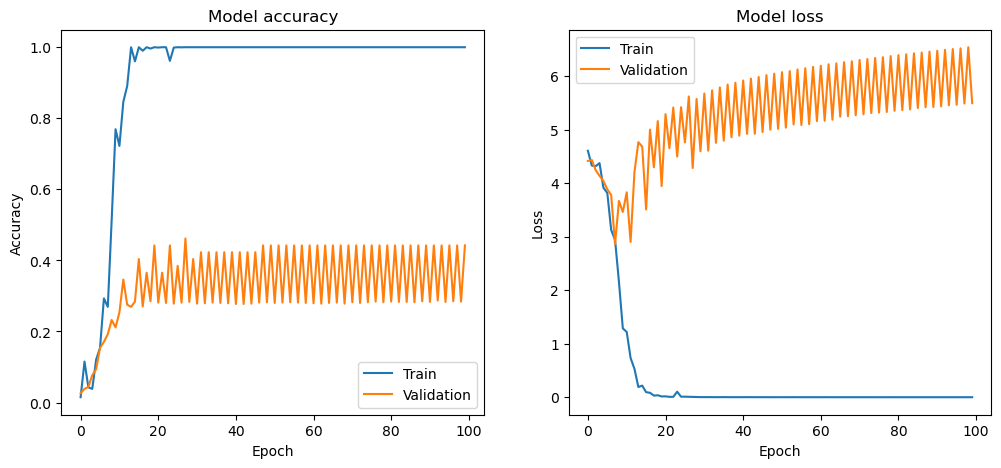

In [65]:
# TWO CONVO LAYER
import matplotlib.pyplot as plt

model.save('two_convo.keras')

# Plotting training & validation accuracy valuSes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_two.history['accuracy'])
plt.plot(history_two.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_two.history['loss'])
plt.plot(history_two.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()
# TWO CONVO LAYER

In [49]:
# THREE CONVO LAYER
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Defining constants
IMG_HEIGHT, IMG_WIDTH = 128, 128  # Image dimensions
BATCH_SIZE = 128
EPOCHS = 100
NUM_CLASSES = 90  
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Defining paths to dataset directories
train_dir = 'Assessment-1-Dataset/animals/Output/Split/train'
val_dir = 'Assessment-1-Dataset/animals/Output/Split/val'
test_dir = 'Assessment-1-Dataset/animals/Output/Split/test'

# Loading training, validation, and test datasets
train_dataset = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',  
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True
)

val_dataset = image_dataset_from_directory(
    val_dir,
    label_mode='categorical',  
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False
)

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',  
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False
)



# Normalizing the datasets
def normalize(image, label):
    return image / 255.0, label

train_dataset = train_dataset.map(normalize, num_parallel_calls=AUTOTUNE)
val_dataset = val_dataset.map(normalize, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.map(normalize, num_parallel_calls=AUTOTUNE)

# Applying data augmentation to the training dataset
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)

# Using .repeat() to ensure datasets don't run out of data
train_dataset = train_dataset.repeat()
val_dataset = val_dataset.repeat()
test_dataset = test_dataset.repeat()

# Prefetching data for improved performance
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# Building the CNN model
model = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),

    # Additional convolutional layers
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Additional convolutional layers
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Additional convolutional layers
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')  
])

# Compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)


total_train_samples = 3226  
total_val_samples = 1076  

# Calculating steps per epoch
steps_per_epoch = total_train_samples // BATCH_SIZE
validation_steps = total_val_samples // BATCH_SIZE

# Training the model
history_three = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=val_dataset,
    validation_steps=validation_steps
)

# Evaluating the model on validation and test data
val_loss, val_acc = model.evaluate(val_dataset, steps=validation_steps)
test_loss, test_acc = model.evaluate(test_dataset, steps=validation_steps)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


# THREE CONVO LAYER

Found 3226 files belonging to 90 classes.
Found 1076 files belonging to 90 classes.
Found 1076 files belonging to 90 classes.
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 522ms/step - accuracy: 0.0075 - loss: 4.5033 - val_accuracy: 0.0254 - val_loss: 4.4741
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 544ms/step - accuracy: 0.0234 - loss: 4.4323 - val_accuracy: 0.0348 - val_loss: 4.3031
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 543ms/step - accuracy: 0.0280 - loss: 4.3197 - val_accuracy: 0.0485 - val_loss: 4.1995
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 483ms/step - accuracy: 0.0431 - loss: 4.2172 - val_accuracy: 0.0549 - val_loss: 4.1405
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 541ms/step - accuracy: 0.0544 - loss: 4.1334 - val_accuracy: 0.0570 - val_loss: 4.1138
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 528ms/step - accuracy: 0.0694 - loss: 4.0430 - val_accuracy: 0.0812 - val_loss: 4.0178
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 525ms/step - accuracy: 0.0747 - loss: 3.9331 - val_

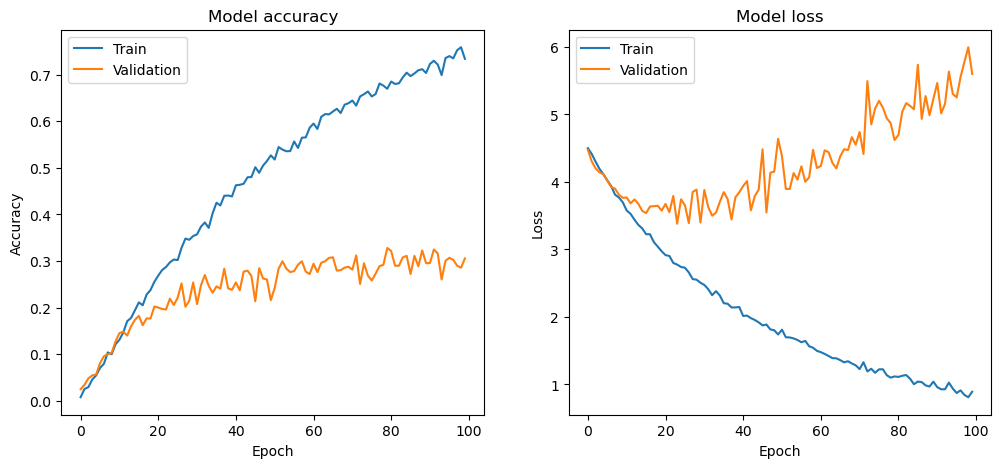

In [51]:
# THREE CONVO LAYER
import matplotlib.pyplot as plt

model.save('three_convo.keras')

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_three.history['accuracy'])
plt.plot(history_three.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_three.history['loss'])
plt.plot(history_three.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()
# THREE CONVO LAYER

In [67]:
# COMPARISON GRAPHS
import matplotlib.pyplot as plt

# Defining the epoch to label (assuming EPOCHS = 100)
epoch_to_label = 99  # Indexing starts at 0

# Plotting training & validation accuracy and loss values
plt.figure(figsize=(12, 6))  # Increased height for two rows

# Validation accuracy
plt.subplot(2, 2, 1)
plt.plot(history_three.history['val_accuracy'])
plt.plot(history_two.history['val_accuracy'])
plt.plot(history_one.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Three Convo', 'Two Convo', 'One Convo'])

# Annotatting the 100th epoch
val_acc_three = history_three.history['val_accuracy'][epoch_to_label]
val_acc_two = history_two.history['val_accuracy'][epoch_to_label]
val_acc_one = history_one.history['val_accuracy'][epoch_to_label]
plt.annotate(f'{val_acc_three:.2f}', (epoch_to_label, val_acc_three), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'{val_acc_two:.2f}', (epoch_to_label, val_acc_two), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'{val_acc_one:.2f}', (epoch_to_label, val_acc_one), textcoords="offset points", xytext=(0, 10), ha='center')

# Training accuracy
plt.subplot(2, 2, 2)
plt.plot(history_three.history['accuracy'])
plt.plot(history_two.history['accuracy'])
plt.plot(history_one.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Three Convo', 'Two Convo', 'One Convo'])

# Annotate the 100 epoch
train_acc_three = history_three.history['accuracy'][epoch_to_label]
train_acc_two = history_two.history['accuracy'][epoch_to_label]
train_acc_one = history_one.history['accuracy'][epoch_to_label]
plt.annotate(f'{train_acc_three:.2f}', (epoch_to_label, train_acc_three), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'{train_acc_two:.2f}', (epoch_to_label, train_acc_two), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'{train_acc_one:.2f}', (epoch_to_label, train_acc_one), textcoords="offset points", xytext=(0, 10), ha='center')

# Validation loss
plt.subplot(2, 2, 3)
plt.plot(history_three.history['val_loss'])
plt.plot(history_two.history['val_loss'])
plt.plot(history_one.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Three Convo', 'Two Convo', 'One Convo'])

# Annotate the 100 epoch
val_loss_three = history_three.history['val_loss'][epoch_to_label]
val_loss_two = history_two.history['val_loss'][epoch_to_label]
val_loss_one = history_one.history['val_loss'][epoch_to_label]
plt.annotate(f'{val_loss_three:.2f}', (epoch_to_label, val_loss_three), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'{val_loss_two:.2f}', (epoch_to_label, val_loss_two), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'{val_loss_one:.2f}', (epoch_to_label, val_loss_one), textcoords="offset points", xytext=(0, 10), ha='center')

# Training loss
plt.subplot(2, 2, 4)
plt.plot(history_three.history['loss'])
plt.plot(history_two.history['loss'])
plt.plot(history_one.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Three Convo', 'Two Convo', 'One Convo'])

# Annotate the 100 epoch
train_loss_three = history_three.history['loss'][epoch_to_label]
train_loss_two = history_two.history['loss'][epoch_to_label]
train_loss_one = history_one.history['loss'][epoch_to_label]
plt.annotate(f'{train_loss_three:.2f}', (epoch_to_label, train_loss_three), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'{train_loss_two:.2f}', (epoch_to_label, train_loss_two), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'{train_loss_one:.2f}', (epoch_to_label, train_loss_one), textcoords="offset points", xytext=(0, 10), ha='center')

# Adjusting layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


# COMPARISON GRAPHS

In [61]:
# Augmentation

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Defining constants
IMG_HEIGHT, IMG_WIDTH = 128, 128  # Image dimensions
BATCH_SIZE = 128
EPOCHS = 100
NUM_CLASSES = 90  
AUTOTUNE = tf.data.AUTOTUNE

# Defining paths to dataset directories
train_dir = 'Assessment-1-Dataset/animals/Output/Split/train'
val_dir = 'Assessment-1-Dataset/animals/Output/Split/val'
test_dir = 'Assessment-1-Dataset/animals/Output/Split/test'

# Loading training, validation, and test datasets
train_dataset = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',  
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True
)

val_dataset = image_dataset_from_directory(
    val_dir,
    label_mode='categorical',  
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False
)

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',  
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False
)

# Normalizing the datasets
def normalize(image, label):
    return image / 255.0, label

train_dataset = train_dataset.map(normalize, num_parallel_calls=AUTOTUNE)
val_dataset = val_dataset.map(normalize, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.map(normalize, num_parallel_calls=AUTOTUNE)

# Applying data augmentation to the training dataset
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)

# Prefetching data for improved performance
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# Building the CNN model
model = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),

    # Additional convolutional layers
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Additional convolutional layers
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Additional convolutional layers
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')  
])

# Compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)

# Train the model
history_three_aug = model.fit(
    train_dataset,
    steps_per_epoch=len(train_dataset) // BATCH_SIZE, 
    epochs=EPOCHS,
    validation_data=val_dataset,
    validation_steps=len(val_dataset) // BATCH_SIZE 
)

# Evaluating the model on validation and test data
val_loss, val_acc = model.evaluate(val_dataset, steps=len(val_dataset) // BATCH_SIZE)
test_loss, test_acc = model.evaluate(test_dataset, steps=len(test_dataset) // BATCH_SIZE)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# Augmentation

Found 4302 files belonging to 90 classes.
Found 538 files belonging to 90 classes.
Found 538 files belonging to 90 classes.
Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 551ms/step - accuracy: 0.0077 - loss: 4.5030 - val_accuracy: 0.0167 - val_loss: 4.4747
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 17s 465ms/step - accuracy: 0.0224 - loss: 4.4544 - val_accuracy: 0.0316 - val_loss: 4.3138
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 639ms/step - accuracy: 0.0371 - loss: 4.2784 - val_accuracy: 0.0502 - val_loss: 4.1806
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 570ms/step - accuracy: 0.0571 - loss: 4.1203 - val_accuracy: 0.0669 - val_loss: 4.0727
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 597ms/step - accuracy: 0.0872 - loss: 3.9622 - val_accuracy: 0.0967 - val_loss: 3.9386
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 603ms/step - accuracy: 0.1112 - loss: 3.7727 - val_accuracy: 0.1264 - val_loss: 3.9175
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 601ms/step - accuracy: 0.1278 - loss: 3.6499 - val_ac

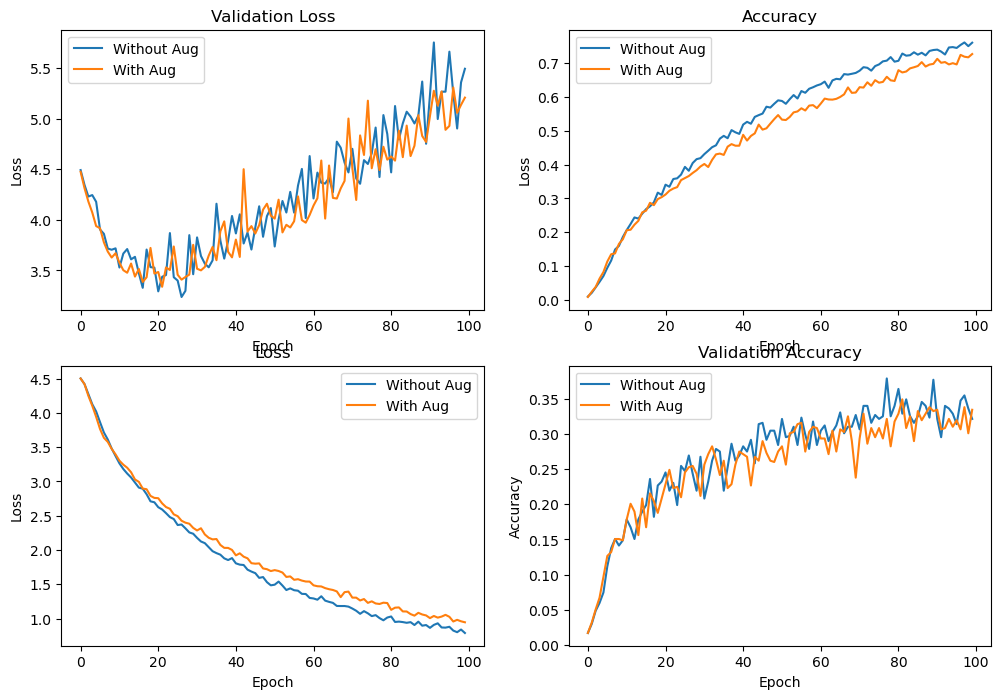

In [123]:
# Augmentation

# Plotting training & validation accuracy and loss values
plt.figure(figsize=(12, 8)) 

# Validation loss
plt.subplot(2, 2, 1)
plt.plot(history_three.history['val_loss'])
plt.plot(history_three_aug.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Without Aug', 'With Aug'])

#  loss
plt.subplot(2, 2, 3)
plt.plot(history_three.history['loss'])
plt.plot(history_three_aug.history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Without Aug', 'With Aug'])

#  Accuracy
plt.subplot(2, 2, 2)
plt.plot(history_three.history['accuracy'])
plt.plot(history_three_aug.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Without Aug', 'With Aug'])

# Validation accuracy
plt.subplot(2, 2, 4)
plt.plot(history_three.history['val_accuracy'])
plt.plot(history_three_aug.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Without Aug', 'With Aug'])

# Displaying the plots
plt.show()

# Augmentation

In [23]:
# regularization

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Defining constants
IMG_HEIGHT, IMG_WIDTH = 128, 128  # Image dimensions
BATCH_SIZE = 128
EPOCHS = 100
NUM_CLASSES = 90  
AUTOTUNE = tf.data.experimental.AUTOTUNE
L2_REGULARIZATION = 0.01  # L2 regularization strength
DROPOUT_RATE = 0.2  # Dropout rate

# Defining paths to dataset directories
train_dir = 'Assessment-1-Dataset/animals/Output/Split/train'
val_dir = 'Assessment-1-Dataset/animals/Output/Split/val'
test_dir = 'Assessment-1-Dataset/animals/Output/Split/test'

# Loading training, validation, and test datasets
train_dataset = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',  
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True
)

val_dataset = image_dataset_from_directory(
    val_dir,
    label_mode='categorical',  
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False
)

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',  
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False
)

# Normalizing the datasets
def normalize(image, label):
    return image / 255.0, label

train_dataset = train_dataset.map(normalize, num_parallel_calls=AUTOTUNE)
val_dataset = val_dataset.map(normalize, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.map(normalize, num_parallel_calls=AUTOTUNE)

# Appling data augmentation to the training dataset
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)

# Prefetching data for improved performance
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# Calculating steps per epoch
train_steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy() // BATCH_SIZE
val_steps_per_epoch = tf.data.experimental.cardinality(val_dataset).numpy() // BATCH_SIZE

# Building the CNN model with regularization and dropout included
model = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                  kernel_regularizer=regularizers.l2(L2_REGULARIZATION)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(DROPOUT_RATE),

    # Additional convolutional layers
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(L2_REGULARIZATION)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(DROPOUT_RATE),

    # Additional convolutional layers
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(L2_REGULARIZATION)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(DROPOUT_RATE),

    # Additional convolutional layers
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(L2_REGULARIZATION)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(DROPOUT_RATE),

    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(L2_REGULARIZATION)),
    layers.Dropout(DROPOUT_RATE),
    layers.Dense(NUM_CLASSES, activation='softmax')  
])

# Compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)

# Train the model
history_three = model.fit(
    train_dataset,
    steps_per_epoch=train_steps_per_epoch,
    epochs=EPOCHS,
    validation_data=val_dataset,
    validation_steps=val_steps_per_epoch
)

# Evaluating the model on validation and test data
val_loss, val_acc = model.evaluate(val_dataset, steps=val_steps_per_epoch)
test_loss, test_acc = model.evaluate(test_dataset)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


# regularization

Found 3226 files belonging to 90 classes.
Found 1076 files belonging to 90 classes.
Found 1076 files belonging to 90 classes.
Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 637ms/step - accuracy: 0.0113 - loss: 7.8812 - val_accuracy: 0.0112 - val_loss: 5.8602
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 592ms/step - accuracy: 0.0131 - loss: 5.5195 - val_accuracy: 0.0112 - val_loss: 4.8572
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 571ms/step - accuracy: 0.0112 - loss: 4.7697 - val_accuracy: 0.0112 - val_loss: 4.6026
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 574ms/step - accuracy: 0.0147 - loss: 4.5797 - val_accuracy: 0.0112 - val_loss: 4.5342
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 572ms/step - accuracy: 0.0104 - loss: 4.5274 - val_accuracy: 0.0112 - val_loss: 4.5134
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 586ms/step - accuracy: 0.0151 - loss: 4.5109 - val_accuracy: 0.0112 - val_loss: 4.5060
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 631ms/step - accuracy: 0.0123 - loss: 4.5050 - val_

KeyboardInterrupt: 

In [135]:
# regularization

# Plotting training & validation accuracy and loss values
plt.figure(figsize=(12, 8)) 

# Validation loss
plt.subplot(2, 2, 1)
plt.plot(history_three.history['val_loss'])
plt.plot(history_three_regulation.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Without regulation', 'With regulation'])

#  loss
plt.subplot(2, 2, 3)
plt.plot(history_three.history['loss'])
plt.plot(history_three_regulation.history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Without regulation', 'With regulation'])

#  Accuracy
plt.subplot(2, 2, 2)
plt.plot(history_three.history['accuracy'])
plt.plot(history_three_regulation.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Without regulation', 'With regulation'])

# Validation accuracy
plt.subplot(2, 2, 4)
plt.plot(history_three.history['val_accuracy'])
plt.plot(history_three_regulation.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Without regulation', 'With regulation'])

# Displaying the plots
plt.show()

# regularization

In [101]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image as keras_image

# Defining class names in alphabetical order
class_names = [
    'antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bision', 'boar', 'butterfly', 'cat', 'caterpillar',
    'chimpanzee', 'cockroach', 'cow', 'coyte', 'crab', 'crow', 'deer', 'dog', 'dolphine', 'donkey', 'dragonfly', 'duck', 'eagle',
    'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog',
    'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'hangroo', 'koala', 'ladybugs', 'leopard',
    'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster',
    'Panada', 'parrot', 'pelecaniformes', 'peguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccon', 'rat', 'reindeer',
    'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan',
    'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra'
]

# Creating a dictionary to map class indices to class names
class_index_to_name = {i: name for i, name in enumerate(class_names)}

# Defining constants
IMG_HEIGHT, IMG_WIDTH = 128, 128  # Image dimensions
NUM_CLASSES = len(class_names)  # Number of classes based on the class_names list

# Loading the model
model = tf.keras.models.load_model('three_convo.keras')

# Function to preprocess the image
def preprocess_image(image_path):
    img = keras_image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = keras_image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Preload the model's prediction function
model_predict_function = model.predict

def predict_image():
    image_path = file_path.get()
    img_array = preprocess_image(image_path)
    predictions = model_predict_function(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class_name = class_index_to_name.get(predicted_class_index, "Unknown Class")
    prediction_label.config(text=f"Predicted Animal: {predicted_class_index} = {predicted_class_name}", fg="white")



# Function to open file dialog and upload image
def upload_image():
    image_path = filedialog.askopenfilename()
    if image_path:
        file_path.set(image_path)
        img = Image.open(image_path)
        img = img.resize((250, 250))
        img = ImageTk.PhotoImage(img)
        img_label.config(image=img)
        img_label.image = img

# Creating the main window
window = tk.Tk()
window.title("Animal Classifier")
window.configure(bg="#800000")

# Set the window size to 400x500 pixels
window.geometry("400x500")

# Defining UI components
file_path = tk.StringVar()

upload_btn = tk.Button(window, text="Upload Image", command=upload_image, bg="#ff6666", fg="white", font=("Arial", 12))
upload_btn.pack(pady=10)

img_label = tk.Label(window, bg="#800000")
img_label.pack(pady=10)

predict_btn = tk.Button(window, text="Predict", command=predict_image, bg="#ff6666", fg="white", font=("Arial", 12))
predict_btn.pack(pady=10)

prediction_label = tk.Label(window, text="", bg="#800000", fg="white", font=("Arial", 14))
prediction_label.pack(pady=10)

# Starting the GUI event loop
window.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
